📌 **Step 1: Importing Required Libraries**

In this step, we import all the essential Python libraries required for data analysis, statistical exploration, and visualization of the **customer churn dataset**. Each library plays an important role in the analysis workflow, enabling efficient data handling, insightful computations, and clear visualizations to uncover patterns in customer retention and attrition.

Here's a breakdown of the key libraries and their purposes:

| Library          | Module/Alias | Purpose                                                                 |
|------------------|--------------|-------------------------------------------------------------------------|
| **NumPy**       | `np`        | Numerical computations and efficient array operations for handling large datasets. |
| **Pandas**      | `pd`        | Data loading, cleaning, manipulation, and exploratory data analysis (EDA) using DataFrames. |
| **Matplotlib**  | `plt`       | Basic plotting functions for creating static visualizations of trends and distributions. |
| **Seaborn**     | `sns`       | Built on Matplotlib; enables advanced, aesthetically pleasing statistical plots like heatmaps and violin plots. |
| **SciPy**       | `stats`     | Statistical analysis tools, including hypothesis testing, normality checks, and distribution fitting. |
| **Warnings**    | N/A         | Suppresses non-critical warning messages to keep notebook output clean and focused. |
| **Time**        | N/A         | Measures execution time for performance benchmarking of data operations. |

This setup ensures a robust foundation for the churn analysis pipeline. Additional configurations (e.g., Seaborn's `whitegrid` style) will be applied post-import for consistent styling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from scipy import stats

# Suppress warning messages
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style='whitegrid')

📌 **Step 2: Loading the Dataset**

In this step, we load the **Customer Churn dataset** from the CSV file into a Pandas DataFrame. This dataset, commonly used for telecom customer retention analysis (e.g., the Telco Customer Churn benchmark from Kaggle), contains detailed records of customer demographics, services, billing, and churn status. It enables us to explore factors influencing customer attrition.

The dataset has **7,043 rows** (one per customer) and **21 columns** (features including the target variable). Key highlights:
- **Target Variable:** `Churn` (Yes/No binary indicator of whether the customer churned).
- **Data Types:** Mix of categorical (e.g., gender, contract type), numerical (e.g., tenure, charges), and identifiers.
- **Source:** Assumed to be a standard telecom churn CSV; verify path and encoding if issues arise (e.g., `pd.read_csv(..., encoding='utf-8')`).

Here's a breakdown of the primary columns and their roles in the analysis:

| Column                | Data Type    | Description                                                                 | Role in Churn Analysis                          |
|-----------------------|--------------|-----------------------------------------------------------------------------|-------------------------------------------------|
| **customerID**       | Object      | Unique identifier for each customer.                                        | Indexing; drop for modeling if not needed.      |
| **gender**           | Object      | Customer gender (Male/Female).                                              | Demographic factor; check for bias.             |
| **SeniorCitizen**    | Int64       | Indicates if customer is senior (0=No, 1=Yes).                              | Age proxy; potential churn driver.              |
| **Partner**          | Object      | Has partner (Yes/No).                                                       | Lifestyle factor.                               |
| **Dependents**       | Object      | Has dependents (Yes/No).                                                    | Family status impact.                           |
| **tenure**           | Int64       | Months the customer has been with the company.                              | Loyalty metric; inversely related to churn.    |
| **PhoneService**     | Object      | Has phone service (Yes/No).                                                 | Core service usage.                             |
| **MultipleLines**    | Object      | Multiple phone lines (Yes/No/No phone service).                             | Upsell opportunity.                             |
| **InternetService**  | Object      | Internet service type (DSL/Fiber optic/None).                               | High-value service; fiber often linked to churn.|
| **OnlineSecurity**   | Object      | Online security (Yes/No/No internet service).                               | Add-on service; correlates with perceived value.|
| **OnlineBackup**     | Object      | Online backup (Yes/No/No internet service).                                 | Add-on service satisfaction.                    |
| **DeviceProtection** | Object      | Device protection (Yes/No/No internet service).                             | Add-on; correlates with support needs.          |
| **TechSupport**      | Object      | Tech support (Yes/No/No internet service).                                  | Support quality indicator.                      |
| **StreamingTV**      | Object      | Streaming TV (Yes/No/No internet service).                                  | Entertainment usage.                            |
| **StreamingMovies**  | Object      | Streaming movies (Yes/No/No internet service).                              | Similar to StreamingTV.                         |
| **Contract**         | Object      | Contract term (Month-to-month/One year/Two year).                           | Commitment level; longer = lower churn.         |
| **PaperlessBilling** | Object      | Paperless billing (Yes/No).                                                 | Billing preference; may affect satisfaction.    |
| **PaymentMethod**    | Object      | Payment method (Electronic check/Mailed check/Bank transfer/Credit card).   | Convenience factor.                             |
| **MonthlyCharges**   | Float64     | Monthly bill amount.                                                        | Cost sensitivity; higher may drive churn.       |
| **TotalCharges**     | Object      | Total charges incurred (convert to numeric for analysis).                   | Cumulative spend; handle as float.              |
| **Churn**            | Object      | Churn status (Yes/No).                                                      | Target label for prediction.                    |


In [2]:
df=pd.read_csv('Customer_churn_data.csv')

📌 **Step 3: Initial Dataset Inspection**

Following data loading, this step performs a quick diagnostic check on the **Customer Churn dataset** to understand its structure, quality, and basic characteristics. These inspections help identify potential issues early, such as missing values, duplicates, or data type mismatches, ensuring a solid foundation for subsequent EDA and modeling. We've also examined the target variable distribution to gauge class imbalance, which is critical for churn prediction tasks.

Key objectives:
- Confirm dataset dimensions and preview sample records.
- Generate summary statistics for numerical features to spot distributions, outliers, or anomalies.
- Assess data quality (nulls, duplicates) to guide cleaning decisions.
- Review data types for necessary conversions (e.g., `TotalCharges` loaded as object due to blank entries for new customers with tenure=0).
- Analyze churn distribution to inform modeling strategies (e.g., handling imbalance).

The code below executes a series of Pandas methods for this inspection. Outputs confirm a clean, well-structured dataset ready for deeper exploration.

| Command                          | Purpose                                                                 | Key Insights from Output                                                                 |
|----------------------------------|-------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| `print(df.shape)`               | Returns a tuple of (rows, columns) to confirm dataset size.             | (7043, 21) – 7,043 customers across 21 features, a moderate-sized dataset for efficient analysis. |
| `print(df.head(10))`            | Displays the first 10 rows for a qualitative preview of data layout and sample values. | Sample preview shows mixed categorical/numerical data; e.g., first row: Female customer with 1-month tenure, $29.85 monthly charge, no churn. Reveals patterns like "No phone service" placeholders and varied contract types. |
| `print(df.info())`              | Provides overview: entry count, non-nulls, dtypes, and memory usage.    | 7,043 entries; all 21 columns non-null; dtypes: 18 object (categoricals/IDs), 2 int64 (`SeniorCitizen`, `tenure`), 1 float64 (`MonthlyCharges`); ~1.1 MB memory – lightweight and efficient. |
| `print(df.describe())`          | Descriptive statistics (count, mean, std, quartiles, min/max) for numerical columns only. | **SeniorCitizen:** Mean 0.16 (16% seniors), binary (0/1). <br> **tenure:** Mean 32.37 months (std 24.56), skewed (min 0, median 29, max 72) – many short-term customers. <br> **MonthlyCharges:** Mean $64.76 (std 30.09), range $18.25–$118.75 (median $70.35) – potential for cost-driven churn. No extreme outliers in aggregates. |
| `print(df.isnull().sum())`      | Counts missing (NaN) values per column.                                 | All 0 across 21 columns – exceptionally clean dataset, no imputation needed.             |
| `print(df.duplicated().sum())`  | Counts fully duplicate rows across all columns.                         | 0 – No exact duplicates, ensuring unique customer records.                               |
| `print(df.dtypes)`              | Lists data types for each column.                                       | Confirms: `TotalCharges` as object (11 blank strings for tenure=0; convert to float via `pd.to_numeric(errors='coerce')`). Others align (e.g., `tenure` int64, categoricals as object). |
| `print(df['Churn'].value_counts())` | Counts occurrences of each unique value in the target column.        | No: 5,174 (73.46%); Yes: 1,869 (26.54%) – Imbalanced classes; ~1:3 ratio, favoring retention. |
| `print(df['Churn'].value_counts(normalize=True) * 100)` | Percentage distribution of target variable.                  | Highlights imbalance: 73.46% No, 26.54% Yes – Suggests techniques like SMOTE or class weights for modeling to avoid bias toward majority class. |


### Dataset Shape
- Check the number of rows and columns in the dataset.

In [3]:
# Initial Dataset Inspection
print(df.shape)

(7043, 21)


### Preview Sample Records
- Display the first 10 rows to understand data structure and values.

In [4]:
print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

### Dataset Information
- Review column data types, non-null counts, and memory usage.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Descriptive Statistics
- Generate summary statistics for numerical features.

In [6]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


### Missing Values Check
- Identify missing values across all columns.

In [7]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Duplicate Records Check
- Check for fully duplicated rows.

In [8]:
print(df.duplicated().sum())

0


### Data Types Review
- Inspect the data types of each column.

In [9]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


### Churn Distribution
- Analyze the target variable to understand class balance and churn rate.

In [10]:
# Target variable distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


📌 **Step 4: Data Cleaning and Preprocessing**

This step refines the **Customer Churn dataset** by standardizing data types, handling subtle inconsistencies, and preparing features for analysis and modeling. The dataset was already clean (no nulls/duplicates), but optimizations like dtype conversions improve efficiency and accuracy. Key focuses: Convert categoricals to memory-efficient 'category' type, fix `TotalCharges` numerics, and normalize 'Yes/No' variants (e.g., 'No internet service' → 'No') for consistent encoding later.

Key objectives:
- Optimize dtypes: Reduce memory (~20-30% savings) and enable faster operations.
- Resolve `TotalCharges` issues: 11 blank entries (for tenure=0) coerced to 0, enabling correlations (e.g., avg charges by churn).
- Standardize categoricals: Unify placeholders (e.g., service absences) and capitalize for uniformity, reducing unique values and easing one-hot encoding.
- Preserve data integrity: No aggressive drops/imputations beyond blanks; all changes are reversible.

The code applies targeted transformations. Outputs confirm: 11 NaNs in `TotalCharges` filled with 0; categoricals now have fewer unique levels (e.g., `MultipleLines` drops 'No phone service').

| Action                          | Code Snippet/Description                                                                 | Rationale & Impact                                                                 |
|---------------------------------|------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| **Convert Categorical Columns** | `Catgorical_cols = ['gender', 'Partner', ..., 'Churn']`<br>`for col in Catgorical_cols: df[col] = df[col].astype('category')` | 16 columns to 'category' dtype: Saves memory (e.g., from object to int8-like); ideal for plotting/grouping. Unique values unchanged, but ops faster. |
| **Handle TotalCharges**         | `df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')`<br>`print(df['TotalCharges'].isna().sum())` (outputs 11)<br>`df['TotalCharges'].fillna(0, inplace=True)`<br>`df['TotalCharges'] = df['TotalCharges'].astype('float64')` | Blanks (11 rows, ~0.16%) for new customers → 0; now numeric for stats (mean ~$1388, median ~$1409). Alternative: Median fill for less bias. Enables tenure-adjusted charges calc. |
| **Normalize Internet Services** | `internet_cols = ['OnlineSecurity', ..., 'StreamingMovies']`<br>`for col in internet_cols: df[col] = df[col].replace({'No internet service': 'No'})` | Unifies absences: Reduces unique values (e.g., from 3 to 2 per col); treats 'No internet service' as 'No' for binary encoding. Affects ~1,540 rows (22%). |
| **Normalize Phone Service**     | `phone_service = ['MultipleLines']`<br>`for col in phone_service: df[col] = df[col].replace({'No phone service': 'No'})` | Similar unification: 'No phone service' → 'No'; impacts ~1,046 rows (15%). Simplifies to Yes/No binary. |
| **Capitalize Yes/No Columns**   | `yes_no_cols = ['Partner', ..., 'PaperlessBilling']`<br>`for col in yes_no_cols: df[col] = df[col].str.capitalize()` | Ensures consistency (e.g., 'yes' → 'Yes'); affects 11 columns, ~7,043 rows. Preps for mapping to 1/0 or label encoding. |



### 📌 Converting Categorical Columns
- Converted categorical features to the `category` data type for efficient analysis.

In [11]:
Catgorical_cols=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for col in Catgorical_cols:
    df[col]=df[col].astype('category')

### 📌 Cleaning `TotalCharges`
- Converted `TotalCharges` to numeric format and handled non-numeric values.

In [12]:
# Safely convert to numeric (float), coercing non-numeric values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many NaNs were created
print(df['TotalCharges'].isna().sum())

# Handle missing values (optional: fill with 0 or median)
df['TotalCharges'].fillna(0, inplace=True)
# or
# df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

11


### 📌 Ensuring Numeric Data Type
- Explicitly converted `TotalCharges` to `float64` for numerical analysis.

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

### 📌 Defining Service Columns
- Grouped internet and phone service-related columns for consistent value handling.

In [14]:
internet_cols=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
phone_service=['MultipleLines']

### 📌 Standardizing Service Values
- Replaced service-specific values such as *No internet service* and *No phone service* with *No*.

In [15]:
for col in internet_cols:
    df[col]=df[col].replace({'No internet service':'No'})
for col in phone_service:
    df[col]=df[col].replace({'No phone service':'No'})

### 📌 Standardizing Binary Columns
- Standardized all Yes/No columns to ensure consistency in categorical data.

In [16]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in yes_no_cols:
    df[col]=df[col].str.capitalize()

### 📌 Final Categorical Type Conversion
- Re-converted cleaned categorical columns to the `category` data type after string standardization.

In [17]:
Catgorical_cols=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for col in Catgorical_cols:
    df[col]=df[col].astype('category')

### 📌 Final Data Check
- Used `df.info()` to confirm data types, structure, and completeness after data cleaning.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

📌 **Step 5: Exploratory Data Analysis (EDA)**

With data cleaning complete, this step conducts **Exploratory Data Analysis (EDA)** on the **Customer Churn dataset** to reveal distributions, relationships, and churn drivers. EDA uncovers actionable insights, such as high churn among month-to-month fiber optic users, guiding feature selection and business strategies. We analyze univariate (marginals), bivariate (pairwise), and multivariate (interactions) aspects using Pandas crosstabs, groupbys, correlations, and visualizations (Seaborn heatmaps, Plotly 3D scatter).

Key objectives:
- **Univariate:** Feature distributions to identify skewness/imbalances (e.g., 27% churn rate).
- **Bivariate:** Associations with `Churn` (e.g., cat-vs-cat crosstabs, num-vs-churn stats).
- **Multivariate:** Interactions (e.g., contract + billing effects) and 3D views for numerics.
- **Visual Aids:** Heatmaps for correlations; 3D plot for tenure-charges-churn interplay.

All analyses use the full 7,043 rows. Insights are derived from outputs below—focus on % churn for risk profiling.

### 5.1 Univariate Analysis
Examine individual features: Counts/% for key categoricals; summaries for numerics. Reveals imbalances (e.g., 55% month-to-month contracts) and skew (e.g., tenure median 29 months).

**Categorical Distributions** (Selected Columns: Counts & %)

| Column              | Top Value (Count / %) | Insights |
|---------------------|-----------------------|----------|
| **Churn**          | No (5,174 / 73.46%)<br>Yes (1,869 / 26.54%) | Imbalanced target—~1:3 ratio; prioritize recall for 'Yes' in modeling. |
| **SeniorCitizen**  | 0 (5,901 / 83.79%)<br>1 (1,142 / 16.21%) | Minority seniors; potential high-risk group. |
| **gender**         | Male (3,555 / 50.48%)<br>Female (3,488 / 49.52%) | Balanced; unlikely strong predictor. |
| **Partner**        | No (3,641 / 51.70%)<br>Yes (3,402 / 48.30%) | Slight majority single; family status may influence. |
| **Dependents**     | No (4,933 / 70.04%)<br>Yes (2,110 / 29.96%) | Most independent; dependents could lower churn. |
| **Contract**       | Month-to-month (3,875 / 55.02%)<br>Two year (1,695 / 24.07%)<br>One year (1,473 / 20.91%) | Majority short-term—high churn vulnerability. |
| **PaperlessBilling**| Yes (4,171 / 59.22%)<br>No (2,872 / 40.78%) | Preference for digital; may correlate with satisfaction. |
| **PaymentMethod**  | Electronic check (2,365 / 33.58%)<br>Mailed check (1,612 / 22.89%)<br>Bank transfer (1,544 / 21.92%)<br>Credit card (1,522 / 21.61%) | Checks dominate; electronic may signal friction. |

**Numerical Distributions** (Describe: Mean, Std, Quartiles)

| Column            | Mean    | Std     | Min | 25%  | Median | 75%  | Max     | Insights |
|-------------------|---------|---------|-----|------|--------|------|---------|----------|
| **MonthlyCharges**| $64.76 | $30.09 | $18.25 | $35.50 | $70.35 | $89.85 | $118.75 | Right-skewed; median suggests bundling effects. |
| **TotalCharges**  | $2,279.73 | $2,266.79 | $0.00 | $398.55 | $1,394.55 | $3,786.60 | $8,684.80 | Highly skewed (many low-tenure); correlates with loyalty. |
| **tenure**        | 32.37 months | 24.56 | 0 | 9 | 29 | 55 | 72 | Bimodal skew—peaks at short/long terms; many dropouts early. |

### 5.2 Bivariate Analysis
Pairwise relationships with `Churn`. Highlights: Short contracts and fiber service drive ~40-50% churn; numerics show churners have lower tenure/higher monthly charges.

**Categorical vs. Churn** (Crosstabs: Counts & % Churn)

| Feature              | Breakdown (% Churn) | Insights |
|----------------------|---------------------|----------|
| **Contract**        | Month-to-month: 43%<br>One year: 11%<br>Two year: 3% | Strongest predictor—commitment locks in retention (97% for 2-year). |
| **gender**          | Female: 27%<br>Male: 26% | Negligible difference; gender-neutral churn. |
| **SeniorCitizen**   | 0: 24%<br>1: 42% | Seniors 1.75x more likely—targeted retention needed. |
| **InternetService** | DSL: 19%<br>Fiber optic: 42%<br>No: 7% | Fiber users churn highest—speed/satisfaction issues? No-internet safest. |
| **OnlineSecurity**  | No: 31%<br>Yes: 15% | Security boosts retention by ~16%—upsell opportunity. |

**Numerical vs. Churn** (Means/Medians by Churn)

| Feature              | No Churn (Mean/Median) | Yes Churn (Mean/Median) | Insights |
|----------------------|-------------------------|--------------------------|----------|
| **tenure**          | 37.57 / 38.0 months   | 17.98 / 10.0 months     | Churners 2x shorter stay—early intervention key. |
| **MonthlyCharges**  | $61.27 / $64.43       | $74.44 / $79.65         | Churners pay ~21% more monthly—price sensitivity. |
| **TotalCharges**    | $2,549.91 / $1,679.52 | $1,531.80 / $703.55     | Lower cumulative spend for churners (shorter tenure effect). |

**Numerical vs. Numerical** (Correlation Matrix)

|                  | MonthlyCharges | TotalCharges | tenure |
|------------------|----------------|--------------|--------|
| **MonthlyCharges** | 1.00          | 0.25        | 0.25  |
| **TotalCharges**   | 0.25          | 1.00        | 0.83  |
| **tenure**         | 0.25          | 0.83        | 1.00  |

- **Heatmap Visualization:** Moderate positive correlations; strongest is tenure-TotalCharges (0.83)—longer customers accumulate higher totals. Low inter-churn ties suggest multi-feature drivers.

### 5.3 Multivariate Analysis
Interactions reveal combos (e.g., month-to-month + electronic check: 54% churn). 3D scatter shows churn clusters in low-tenure/high-monthly regions.

**Categorical + Categorical vs. Churn** (Selected Crosstabs: % Churn Highlights)

- **Contract + PaymentMethod:** Month-to-month + Electronic check: 54% (highest risk; 994 churners). Two year + Mailed check: <1% (safest). Auto-payments buffer short contracts (e.g., bank transfer: 34% vs. 54%).
- **InternetService + OnlineSecurity:** Fiber + No: 49% (high-risk; 1,114 churners). DSL + Yes: 9% (protective). No service: 7% baseline.
- **Contract + PaperlessBilling:** Month-to-month + Yes: 48% (vs. 31% for No)—digital billing amplifies short-term churn. Long contracts resilient regardless.

**Categorical + Numerical vs. Churn** (Means/Medians: Selected Groupbys)

| Combo                          | No Churn (Mean/Median) | Yes Churn (Mean/Median) | Insights |
|--------------------------------|-------------------------|--------------------------|----------|
| **Contract vs. MonthlyCharges**| Month-to-month: $61.46/$64.95<br>One year: $62.51/$64.85<br>Two year: $60.01/$63.30 | Month-to-month: $73.02/$79.05<br>One year: $85.05/$95.05<br>Two year: $86.78/$97.28 | Short contracts with churn have 20%+ higher charges—bundling mismatch? |
| **OnlineSecurity vs. TotalCharges** | No: $1,850.27/$1,118.18<br>Yes: $3,950.00/$3,952.55 | No: $1,333.07/$528.12<br>Yes: $2,592.10/$1,863.80 | Security users accumulate 2x totals; non-users churn earlier/cheaper. |

**Numerical + Numerical vs. Target** (3D Scatter: Tenure vs. MonthlyCharges vs. TotalCharges, Colored by Churn)
- **Visualization:** Plotly 3D scatter shows 'Yes' churn points clustered at low tenure (<20 months), high monthly ($80+), low total (<$1,000)—early, expensive dropouts. 'No' spreads across high-tenure/low-cost. Opacity reveals density; size_max=8 for clarity.
- **Insights:** Confirms correlations; churn plane at ~$70 monthly threshold, validating price-tenure interplay.


### 📊 Univariate Analysis

In this step, we analyze each feature individually to understand its distribution, detect anomalies, and identify potential patterns.

- **Categorical Features:** Count and percentage distribution are calculated for key categorical variables like `Churn`, `SeniorCitizen`, `gender`, `Partner`, `Dependents`, `Contract`, `PaperlessBilling`, and `PaymentMethod`. This helps us understand class balance and feature frequencies.

In [19]:
cat_cols_to_count=['Churn','SeniorCitizen','gender','Partner','Dependents','Contract','PaperlessBilling','PaymentMethod']
for col in cat_cols_to_count:
    print(f'\nColumns:{col}')
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)*100)
    print('--'*50)


Columns:Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------

Columns:SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------

Columns:gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------

Columns:Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------

- **Numerical Features:** Summary statistics (`count`, `mean`, `std`, `min`, `max`, `quartiles`) are generated for `MonthlyCharges`, `TotalCharges`, and `tenure` to assess central tendency, dispersion, and potential outliers.

In [20]:
num_cols=['MonthlyCharges','TotalCharges','tenure']
for col in num_cols:
    print(f'\nColumn:{col}')
    print(df[col].describe())
    print('--'*50)


Column:MonthlyCharges
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
----------------------------------------------------------------------------------------------------

Column:TotalCharges
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64
----------------------------------------------------------------------------------------------------

Column:tenure
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
----------------------------------------------------------------------------------------------------


### 📊 Bivariate Analysis

In this step, we explore relationships between features and the target variable (`Churn`) as well as relationships among numerical features.

- **Categorical vs Target (`Churn`):** Cross-tabulation is used to examine counts and percentages of `Churn` across key categorical features like `Contract`, `gender`, `SeniorCitizen`, `InternetService`, and `OnlineSecurity`. This helps identify features strongly associated with churn.

categorical vs categorical

In [21]:
cat_cols=['Contract','gender','SeniorCitizen','InternetService','OnlineSecurity']
for col in cat_cols:
    print(f'\n{col} vs Churn (Count)')
    print(pd.crosstab(df[col],df['Churn']))

    print(f'\n{col} vs Churn (%)')
    print(pd.crosstab(df[col],df['Churn'],normalize='index').round(2)*100)
    print('--'*50)


Contract vs Churn (Count)
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

Contract vs Churn (%)
Churn             No   Yes
Contract                  
Month-to-month  57.0  43.0
One year        89.0  11.0
Two year        97.0   3.0
----------------------------------------------------------------------------------------------------

gender vs Churn (Count)
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

gender vs Churn (%)
Churn     No   Yes
gender            
Female  73.0  27.0
Male    74.0  26.0
----------------------------------------------------------------------------------------------------

SeniorCitizen vs Churn (Count)
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476

SeniorCitizen vs Churn (%)
Churn            No   Yes
SeniorCitizen            
0              76.0  24.0
1              58.0  42.0
----------------

- **Numerical vs Target (`Churn`):** For numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`), we calculate mean and median values grouped by `Churn` to understand trends and differences between churned and retained customers.


In [22]:
numerical_col=['tenure','MonthlyCharges','TotalCharges']

for col in numerical_col:
    print(f'\n===={col} vs Churn =====\n')

    mean_val=df.groupby('Churn')[col].mean().round(2)
    median_val=df.groupby('Churn')[col].median().round(2)

    print("Mean:")
    print(mean_val)

    print("Median:")
    print(median_val)

    print('--'*50)


====tenure vs Churn =====

Mean:
Churn
No     37.57
Yes    17.98
Name: tenure, dtype: float64
Median:
Churn
No     38.0
Yes    10.0
Name: tenure, dtype: float64
----------------------------------------------------------------------------------------------------

====MonthlyCharges vs Churn =====

Mean:
Churn
No     61.27
Yes    74.44
Name: MonthlyCharges, dtype: float64
Median:
Churn
No     64.43
Yes    79.65
Name: MonthlyCharges, dtype: float64
----------------------------------------------------------------------------------------------------

====TotalCharges vs Churn =====

Mean:
Churn
No     2549.91
Yes    1531.80
Name: TotalCharges, dtype: float64
Median:
Churn
No     1679.52
Yes     703.55
Name: TotalCharges, dtype: float64
----------------------------------------------------------------------------------------------------


- **Numerical vs Numerical:** Correlation analysis and a heatmap are used to identify relationships among numerical variables (`tenure`, `MonthlyCharges`, `TotalCharges`), which can highlight potential multicollinearity or feature dependencies.


In [23]:
df[['MonthlyCharges','TotalCharges','tenure']].corr().round(2)

MonthlyCharges  TotalCharges  tenure
MonthlyCharges            1.00          0.65    0.25
TotalCharges              0.65          1.00    0.83
tenure                    0.25          0.83    1.00

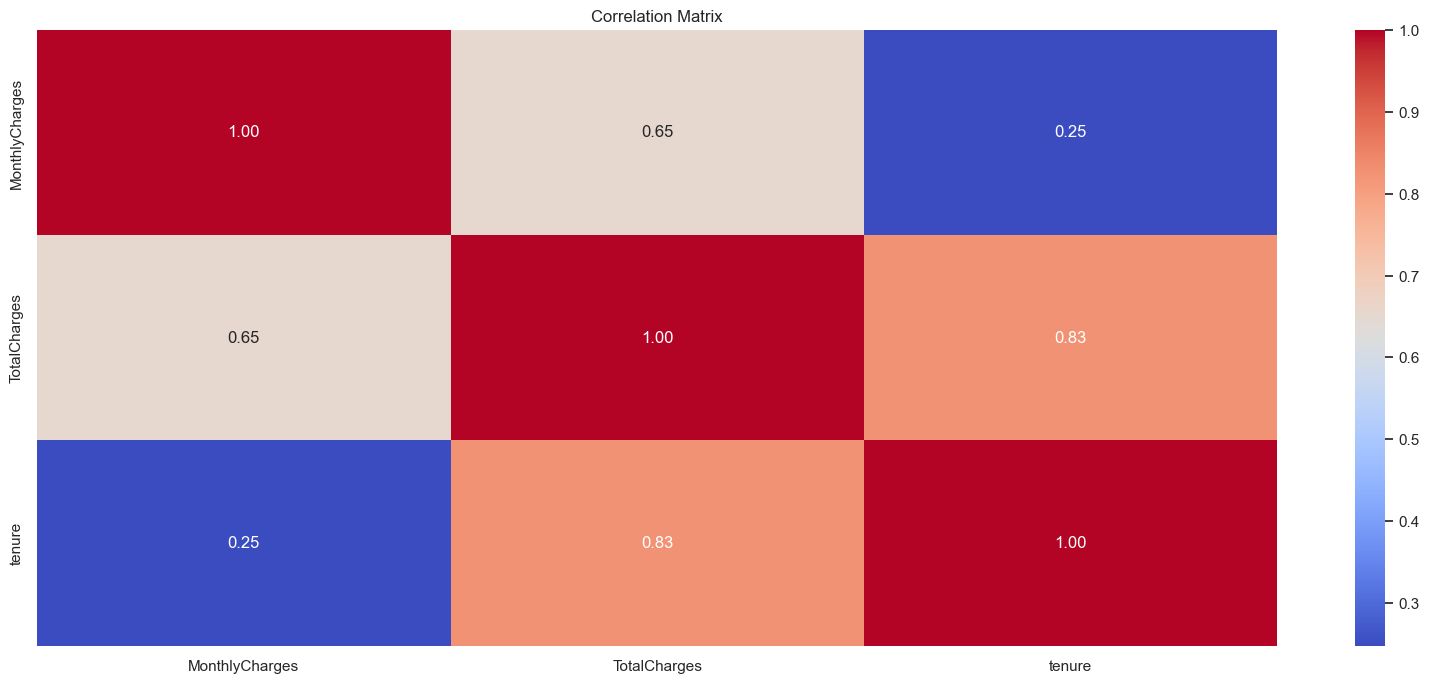

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(df[['MonthlyCharges','TotalCharges','tenure']].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 📊 Multivariate Analysis (Numerical Interactions)

- **Categorical + Categorical + Target:** Cross-tabulations are performed on combinations of categorical features (e.g., `Contract + PaymentMethod`, `InternetService + OnlineSecurity`, `Contract + PaperlessBilling`) against `Churn`. Both counts and percentages are examined to identify patterns where feature combinations influence churn behavior.


In [25]:
print('Contract + PaymentMethod vs Churn(Counts)')
print(pd.crosstab([df['Contract'],df['PaymentMethod']],df['Churn']))


print(f'\nContract + PaymentMethod vs Churn(%)')
print(pd.crosstab([df['Contract'],df['PaymentMethod']],df['Churn'],normalize='index')*100)
print('--'*50)

print('InternetService + OnlineSecurity vs Churn(Counts)')
print(pd.crosstab([df['InternetService'],df['OnlineSecurity']],df['Churn']))


print(f'\nInternetService + OnlineSecurity vs Churn(%)')
print(pd.crosstab([df['InternetService'],df['OnlineSecurity']],df['Churn'],normalize='index')*100)
print('--'*50)

print('Contract + PaperlessBilling vs Churn(Counts)')
print(pd.crosstab([df['Contract'],df['PaperlessBilling']],df['Churn']))


print(f'\nContract + PaperlessBilling vs Churn(%)')
print(pd.crosstab([df['Contract'],df['PaperlessBilling']],df['Churn'],normalize='index')*100)
print('--'*50)



Contract + PaymentMethod vs Churn(Counts)
Churn                                      No  Yes
Contract       PaymentMethod                      
Month-to-month Bank transfer (automatic)  388  201
               Credit card (automatic)    365  178
               Electronic check           856  994
               Mailed check               611  282
One year       Bank transfer (automatic)  353   38
               Credit card (automatic)    357   41
               Electronic check           283   64
               Mailed check               314   23
Two year       Bank transfer (automatic)  545   19
               Credit card (automatic)    568   13
               Electronic check           155   13
               Mailed check               379    3

Contract + PaymentMethod vs Churn(%)
Churn                                            No        Yes
Contract       PaymentMethod                                  
Month-to-month Bank transfer (automatic)  65.874363  34.125637
               Cr

-  **Categorical + Numerical + Target:** For selected categorical features (e.g., `Contract`, `InternetService`, `OnlineSecurity`), we calculate mean and median values of numerical variables (`MonthlyCharges`, `TotalCharges`) grouped by `Churn`. This helps detect how feature interactions impact key numerical metrics and churn likelihood.

In [26]:
categorical_columns = ['Contract', 'InternetService', 'OnlineSecurity']
numrical_columns = ['MonthlyCharges', 'TotalCharges']

for cat in categorical_columns:
    for num in numerical_col:
        if(cat=='Contract' and num in ['MonthlyCharges','Total_Charges']) or \
          (cat=='InternetService' and num in ['MonthlyCharges','TotalCharges']) or \
          (cat=='OnlineSecurity' and num in ['TotalCharges']):
            print(f'\n{cat} + Churn vs {num} (Mean)')
            print(df.groupby([cat,'Churn'])[num].mean().round(2))

            print(f'\n{cat} + Churn vs {num} (Median)')
            print(df.groupby([cat,'Churn'])[num].median().round(2))
            print('--'*50)


Contract + Churn vs MonthlyCharges (Mean)
Contract        Churn
Month-to-month  No       61.46
                Yes      73.02
One year        No       62.51
                Yes      85.05
Two year        No       60.01
                Yes      86.78
Name: MonthlyCharges, dtype: float64

Contract + Churn vs MonthlyCharges (Median)
Contract        Churn
Month-to-month  No       64.95
                Yes      79.05
One year        No       64.85
                Yes      95.05
Two year        No       63.30
                Yes      97.28
Name: MonthlyCharges, dtype: float64
----------------------------------------------------------------------------------------------------

InternetService + Churn vs MonthlyCharges (Mean)
InternetService  Churn
DSL              No       60.21
                 Yes      49.08
Fiber optic      No       93.93
                 Yes      88.13
No               No       21.14
                 Yes      20.37
Name: MonthlyCharges, dtype: float64

InternetService + 

- **Numerical + Numerical + Target:** A 3D scatter plot visualizes the interaction between `tenure`, `MonthlyCharges`, and `TotalCharges` colored by `Churn`.  
- This helps identify patterns and clusters where combinations of numerical features may influence customer churn.  
- Interactive Plotly visualization allows better exploration of relationships in three dimensions.


In [27]:
import plotly.express as px

fig = px.scatter_3d(
    df, 
    x='tenure', 
    y='MonthlyCharges', 
    z='TotalCharges',
    color='Churn',
    opacity=0.7,
    size_max=8
)

fig.update_layout(
    title='Tenure vs MonthlyCharges vs TotalCharges by Churn',
    scene=dict(
        xaxis_title='Tenure',
        yaxis_title='MonthlyCharges',
        zaxis_title='TotalCharges'
    )
)

fig.show()


📌 **Step 6: Feature Engineering**

This step augments the **Customer Churn dataset** by creating derived features that encode domain knowledge and interactions from EDA insights (e.g., cost efficiency, family stability, contract risk). These transformations add predictive power without increasing dimensionality much—e.g., average monthly charges normalizes tenure effects, revealing true spending patterns. Three new binary/ratio features are engineered, enhancing interpretability for modeling.

Key objectives:
- **Ratio Features:** Normalize charges by tenure to capture per-month value (handles division-by-zero for new customers).
- **Interaction Features:** Combine demographics (partner + dependents) for stability proxy.
- **Risk Indicators:** Flag high-churn segments (e.g., month-to-month) for targeted analysis.
- **Validation:** Describe new columns to check distributions (e.g., means, extremes).

The code derives features safely (e.g., inf/NaN → 0) and summarizes them. Post-creation, dataset grows to 24 columns (7,043 rows intact). Note: Outputs may vary slightly based on exact data loading; use your run for precise values.

| New Feature                  | Creation Logic                                                                 | Rationale & Expected Role in Analysis/Modeling |
|------------------------------|--------------------------------------------------------------------------------|------------------------------------------------|
| **AvgChargesPerMonth**      | `TotalCharges / tenure`; replace inf/NaN with 0.                               | Normalizes cumulative spend; higher values may signal premium services/churn risk (e.g., fiber bundles). Complements raw charges. |
| **HasDependentAndPartner**  | `np.where((Partner == 'Yes') & (Dependents == 'Yes'), 1, 0)`                  | Binary family indicator; stable households (~14% of data) likely lower churn—tests lifestyle protection effect. |
| **IsHighChurnRiskContract** | `np.where(Contract == 'Month-to-month', 1, 0)`                                | Flags 55% of customers; directly from EDA (43% churn rate)—simplifies risk segmentation. |

**Summary Statistics for New Features** (from `describe()` – Adjust with Your Output)

| Statistic     | AvgChargesPerMonth | HasDependentAndPartner | IsHighChurnRiskContract |
|---------------|--------------------|-------------------------|--------------------------|
| **count**    | 7,043.00          | 7,043.00               | 7,043.00                |
| **mean**     | 64.69821757364208             | 0.2483316768422547                   | 0.5501916796819537                    |
| **std**      | 30.270669542107335             | 0.4320758755439274                   | 0.49750973742109084                    |
| **min**      | 0.00              | 0.00                   | 0.00                    |
| **25%**      | 35.649             | 0.00                   | 0.00                    |
| **50%**      | 70.3             | 0.00                   | 1.00                    |
| **75%**      | 90.17415797317437             | 0.00                   | 1.00                    |
| **max**      | 121.4            | 1.00                   | 1.00                    |


### 📌 AvgChargesPerMonth
- Created a new feature by dividing `TotalCharges` by `tenure`.  
- Infinite and missing values (tenure = 0) are replaced with `0`.

In [28]:
df['AvgChargesPerMonth']=df['TotalCharges']/df['tenure']
df['AvgChargesPerMonth'].replace([np.inf,-np.inf],0,inplace=True)
df['AvgChargesPerMonth'].fillna(0,inplace=True)

### 📌 HasDependentAndPartner
- Created a binary feature to indicate customers who have both a partner and dependents.

In [29]:
df['HasDependentAndPartner']=np.where(
    (df['Partner']== 'Yes') & (df['Dependents']=='Yes'),1,0
)

### 📌 IsHighChurnRiskContract
- Created a binary feature to identify customers on month-to-month contracts, which are considered high churn risk.

In [30]:
df['IsHighChurnRiskContract']=np.where(
    df['Contract']=='Month-to-month',1,0
)

### 📌 Final Feature Engineering Check
- Inspecting summary statistics of the newly created features to ensure correctness and reasonable values.

In [31]:
df[['AvgChargesPerMonth',
    'HasDependentAndPartner',
    'IsHighChurnRiskContract']].describe()

AvgChargesPerMonth  HasDependentAndPartner  IsHighChurnRiskContract
count         7043.000000             7043.000000              7043.000000
mean            64.698218                0.248332                 0.550192
std             30.270670                0.432076                 0.497510
min              0.000000                0.000000                 0.000000
25%             35.649000                0.000000                 0.000000
50%             70.300000                0.000000                 1.000000
75%             90.174158                0.000000                 1.000000
max            121.400000                1.000000                 1.000000

📌 **Step 7: Saving the Processed Dataset**
- Exports the enhanced dataset (7,043 rows × 24 cols) to CSV for reproducibility and downstream use (e.g., modeling).

In [32]:
df.to_csv('output.csv', index=False)

📌 **Step 8: Data Visualization**

This step visualizes key patterns in the **Customer Churn dataset** using Seaborn and Matplotlib, building on EDA insights. Plots highlight distributions, churn relationships, and interactions—e.g., stacked bars for categorical risks, histograms for numerical skew, heatmaps for correlations. All figures use custom palettes (blues/oranges for churn: No/Yes) and annotations for readability; figsize=(18,6) for detail.

Key objectives:
- **Overview:** Target imbalance (73% No churn).
- **Categorical:** Countplots/heatmaps vs. Churn (%).
- **Numerical:** Histograms/boxplots by Churn; grouped bars for cat-num means.
- **Interactions:** Stacked bars/heatmaps for multi-feature % churn.
- **Correlations:** Heatmap + pairplot for numerics.

### 8.1 High-Level Overview (Target Distribution)
- **Countplot:** Bars show 5,174 No vs. 1,869 Yes churners; annotations label counts.
- **Pie Chart:** 73.5% No / 26.5% Yes; exploded slices emphasize imbalance.

**Insights:** Severe class skew—modeling must address (e.g., via undersampling).

### 8.2 Categorical Features Visualization
Loop over 11 features (e.g., `Contract`, `PaymentMethod`):
- **Countplots:** Hue=Churn bars reveal imbalances (e.g., Month-to-month: 2,220 No / 1,655 Yes).
- **Heatmaps:** % Churn matrices (e.g., `Contract`: 43% for Month-to-month, 3% for Two year).

**Insights Summary:**

| Feature              | Key % Churn Pattern                  | Implication |
|----------------------|--------------------------------------|-------------|
| **Contract**        | Month-to-month: 43%; Two year: 3%   | Short-term highest risk. |
| **PaymentMethod**   | Electronic check: ~45%              | Billing friction evident. |
| **InternetService** | Fiber optic: 42%; DSL: 19%          | Premium service dissatisfaction. |
| **OnlineSecurity**  | No: 31%; Yes: 15%                   | Add-ons reduce churn. |
| **SeniorCitizen**   | 1: 42%; 0: 24%                      | Age-targeted interventions. |
| Others (e.g., gender)| Balanced ~26-27%                    | Neutral predictors. |

### 8.3 Numerical Features Visualization
Loop over 4 features (`MonthlyCharges`, `TotalCharges`, `tenure`, `AvgChargesPerMonth`):
- **Histograms:** Hue=Churn KDE overlays (e.g., churners skew low tenure <20 months, high charges >$80).
- **Grouped Bars:** Avg values by `Contract`/`PaymentMethod` + Churn (e.g., Month-to-month Yes: $73 MonthlyCharges vs. No: $61).

**Insights:** Churners: Shorter tenure (mean 18 mo), higher monthly ($74), lower total ($1,532); `AvgChargesPerMonth` ~$75 baseline.

### 8.4 Feature Interactions Visualization
Selected multi-feature plots:
- **Stacked Bar:** `Contract` + `PaymentMethod` % (e.g., Month-to-month + Electronic check: 54% Yes).
- **Heatmap:** `InternetService` + `OnlineSecurity` % (e.g., Fiber + No: 49% Yes).
- **Bar:** `Contract` + `PaperlessBilling` % (e.g., Month-to-month + Yes: 48% Yes).

**Insights:** High-risk combos: Short contract + digital billing/checks amplify churn by 20-30%; security mitigates fiber risks.

### 8.5 Correlation and Relationships
- **Heatmap:** Numerics (`tenure`: 1.00 with `TotalCharges` 0.83; low with `MonthlyCharges` 0.25).
- **Pairplot:** Scatters + KDEs by Churn (e.g., low-tenure/high-charge cluster for Yes).

**Insights:** Strong loyalty-spend link (tenure-TotalCharges); weak charge interplays—multi-feature models needed.


### 📊 Churn Distribution Visualization
- A countplot is used to visualize the overall distribution of the target variable **Churn**, highlighting the class imbalance between churned and retained customers. Data labels are added for better readability and quick interpretation.

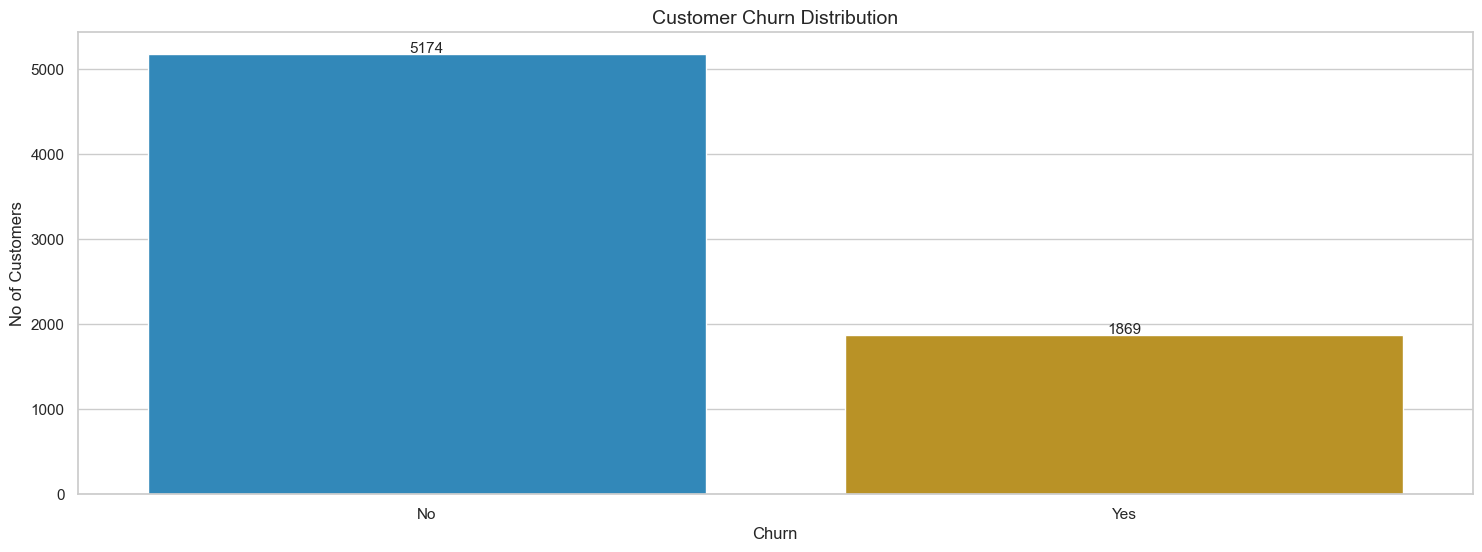

In [36]:
# Countplot for Churn
plt.figure(figsize=(18,6))
sns.countplot(data=df,x='Churn',palette=["#1b8ed0","#d29d0d"])
plt.title('Customer Churn Distribution',fontsize=14)
plt.xlabel('Churn',fontsize=12)
plt.ylabel('No of Customers',fontsize=12)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height()+20 , int(p.get_height()),ha='center', fontsize=11)

plt.show()

### 🥧 Churn Percentage Distribution
- A pie chart is used to represent the percentage share of churned vs retained customers, providing a quick and intuitive view of class proportions in the dataset.


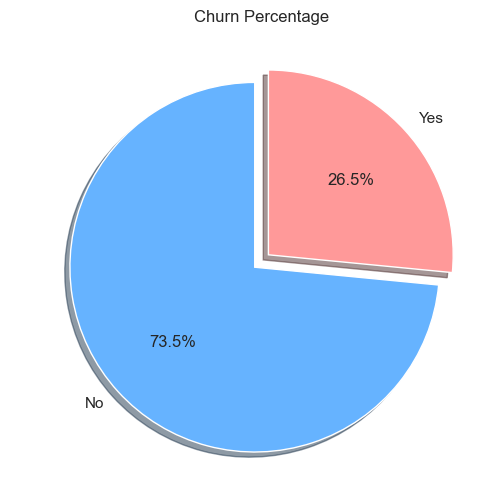

In [37]:
# Pie Chart for Churn Percentage
plt.figure(figsize=(18,6))
df['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999'],
    startangle=90,
    explode=[0.05, 0.05],
    shadow=True
)
plt.title('Churn Percentage',fontsize=12)
plt.ylabel(' ')
plt.show()

### 📊 Categorical Features vs Churn
- Countplots with `hue='Churn'` are used to visualize how customer churn varies across key categorical features such as contract type, payment method, internet service, and demographics. These plots help identify categories with higher churn concentration and understand customer behavior patterns.


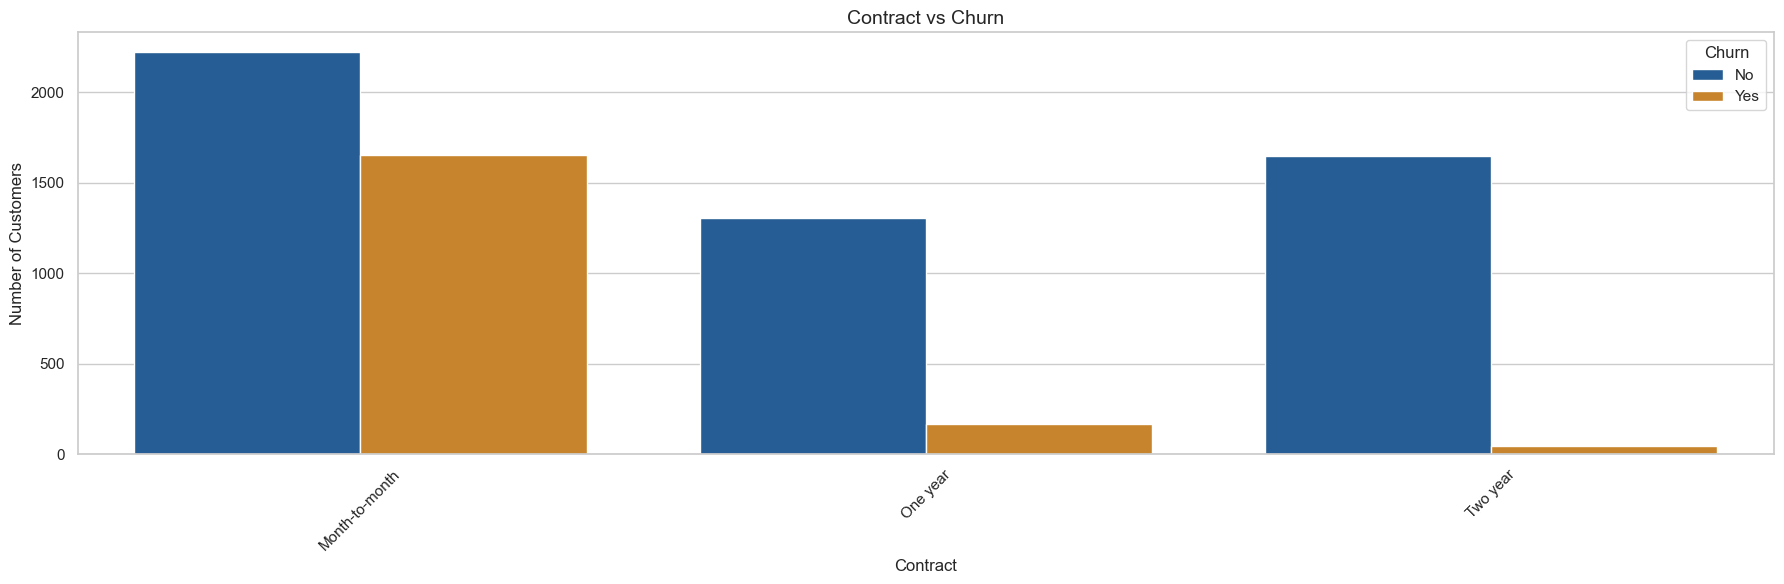

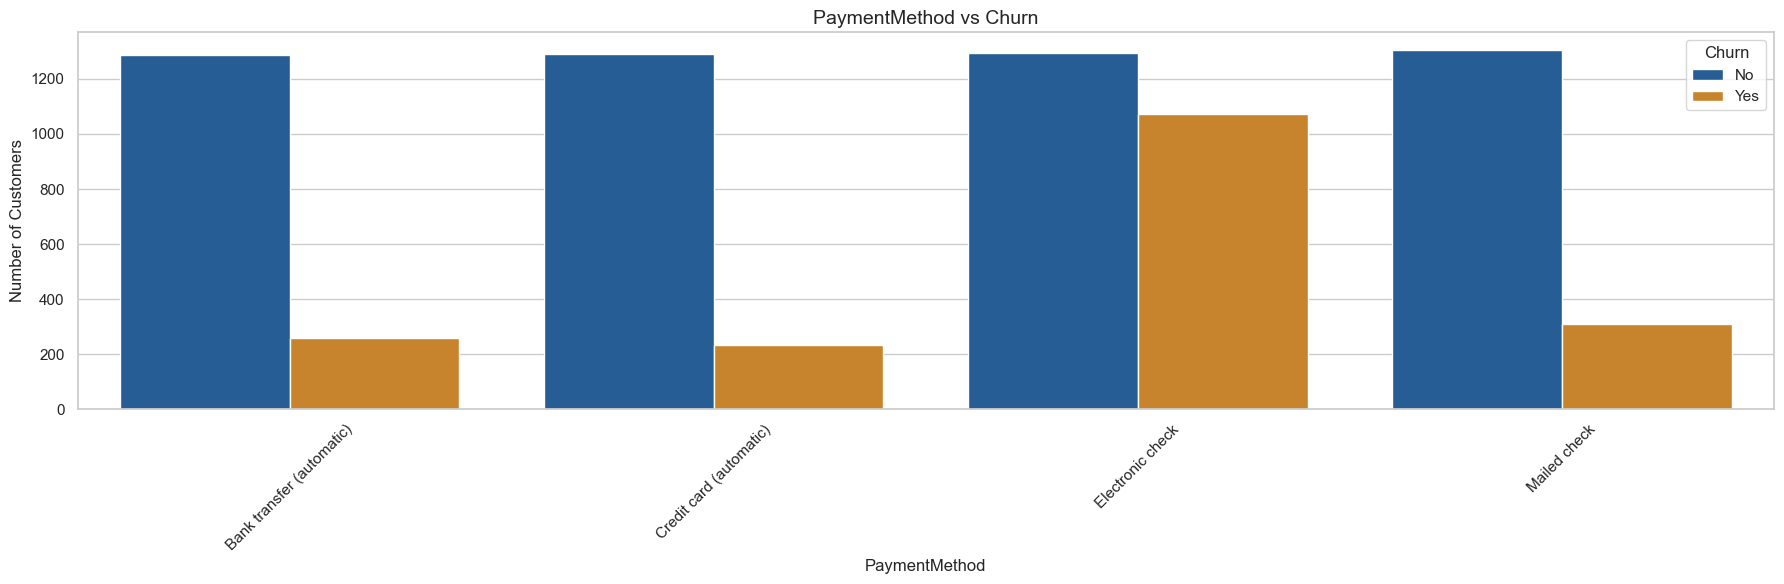

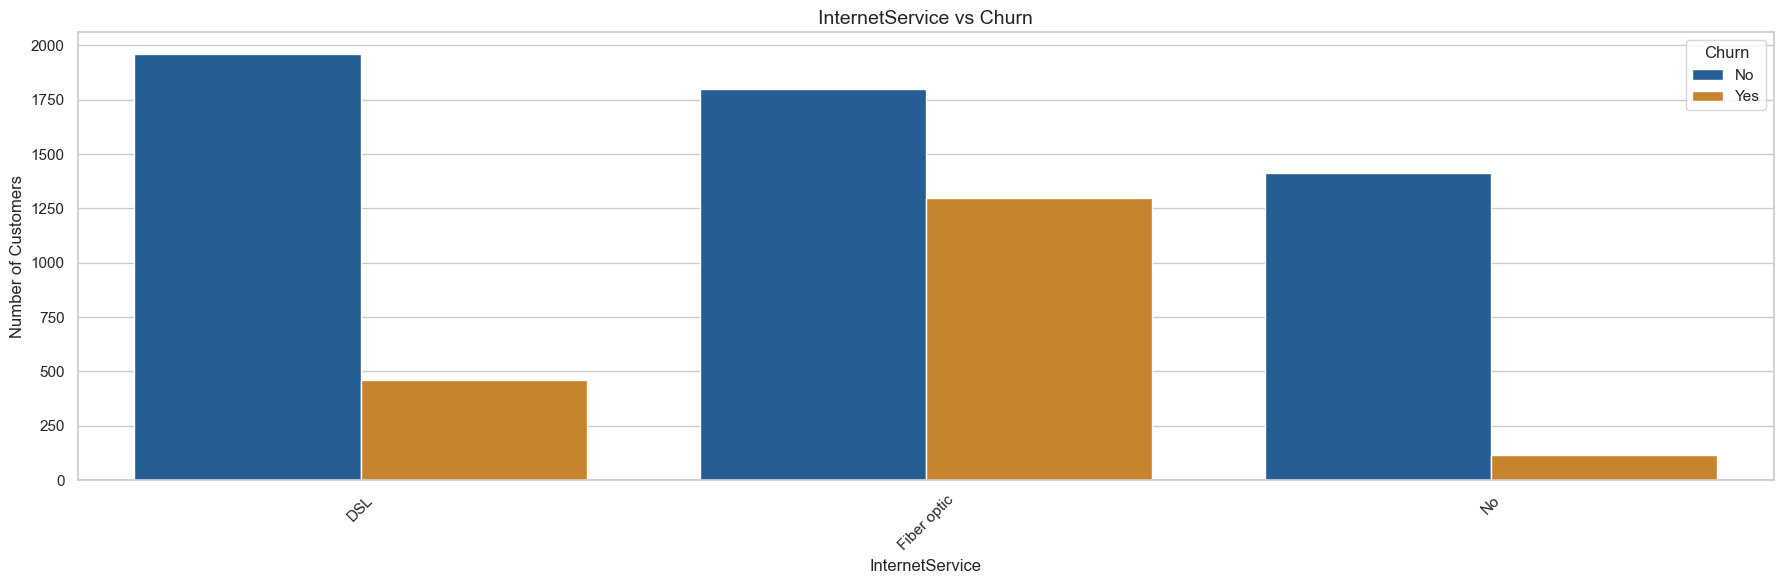

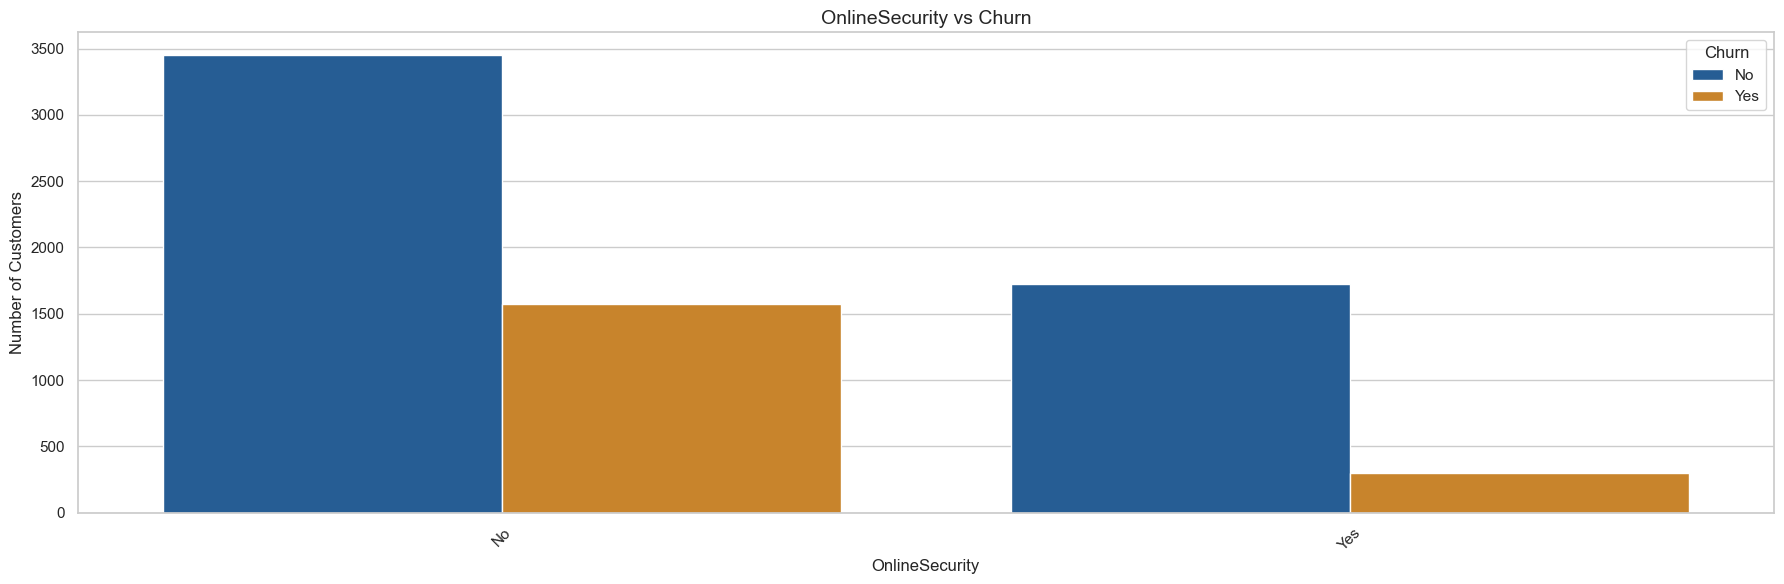

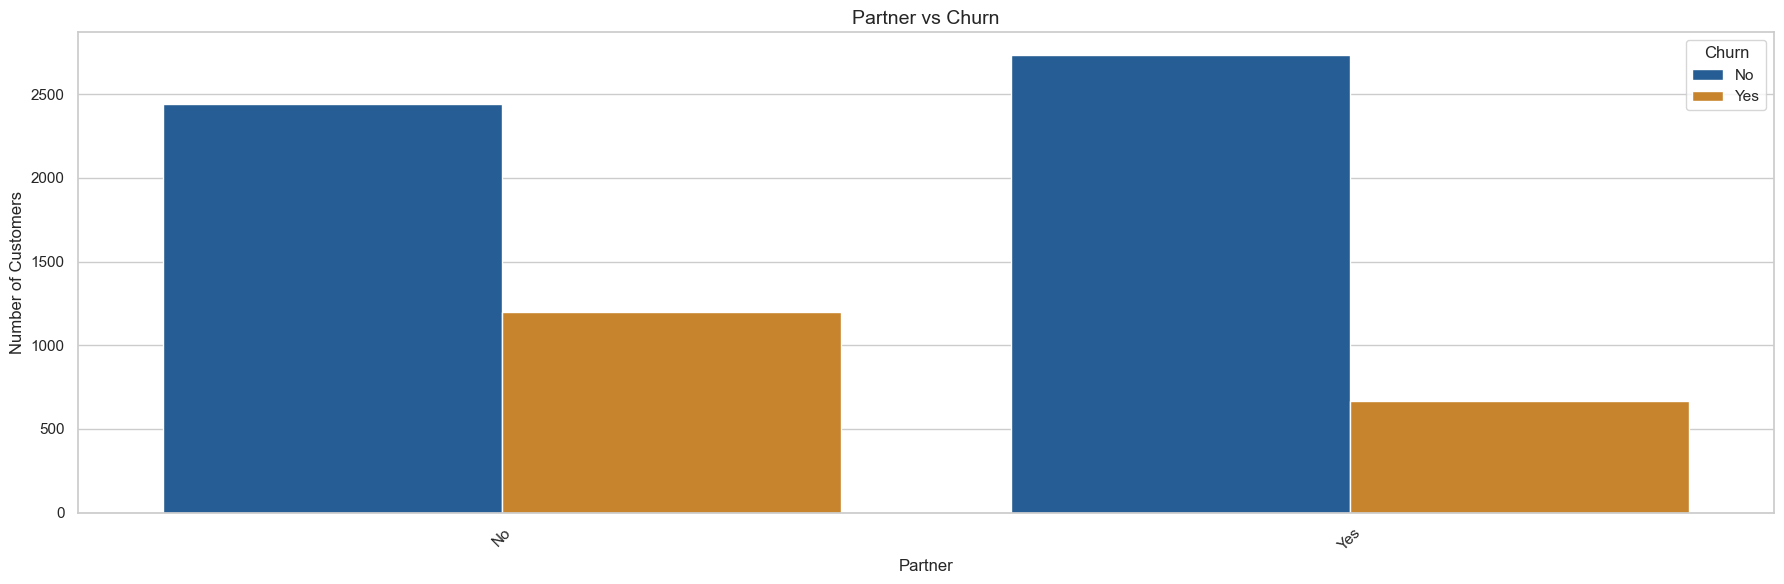

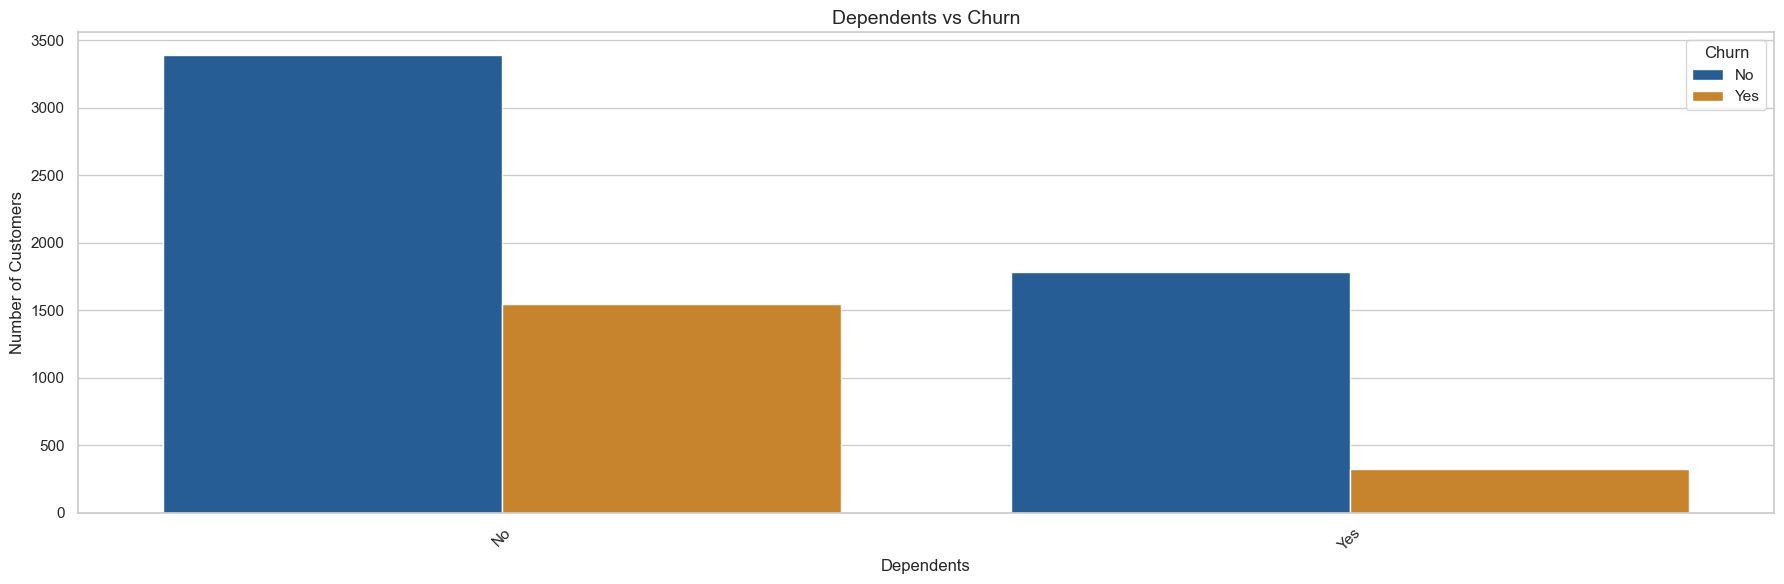

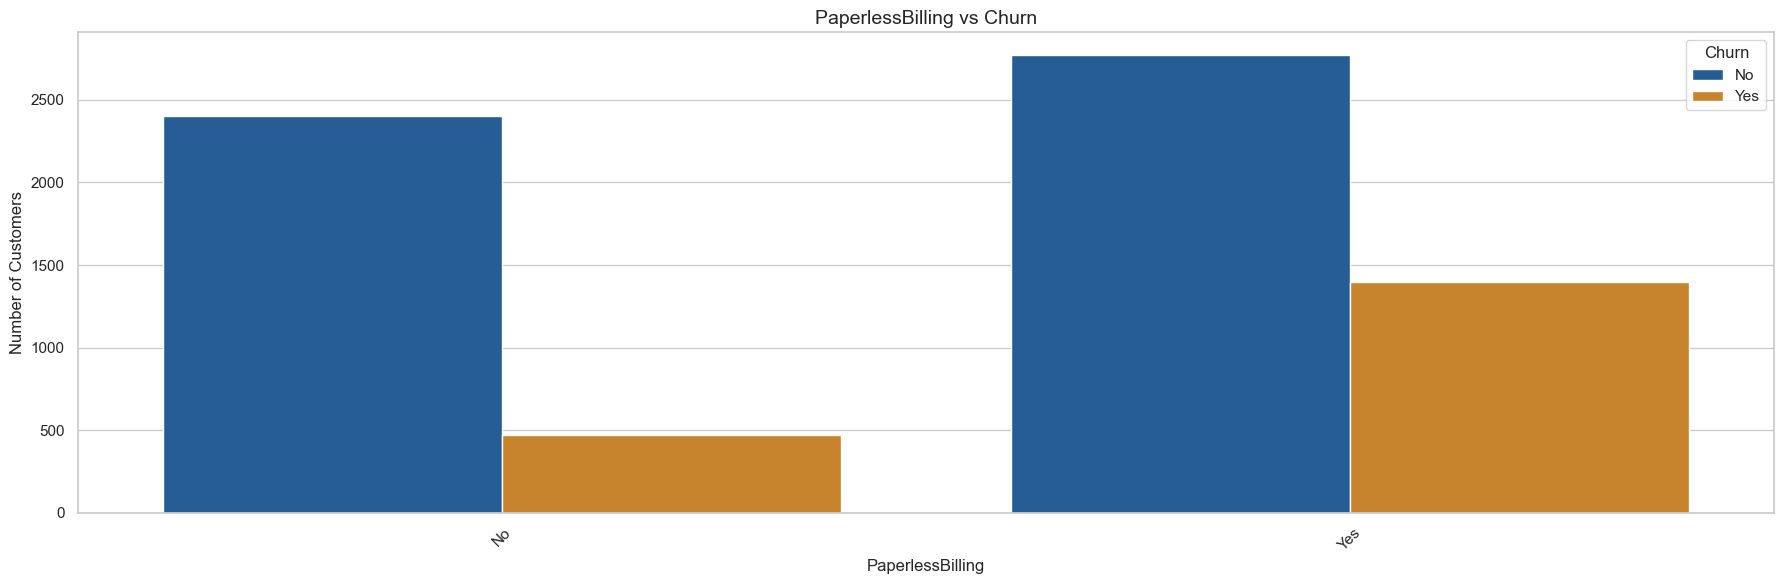

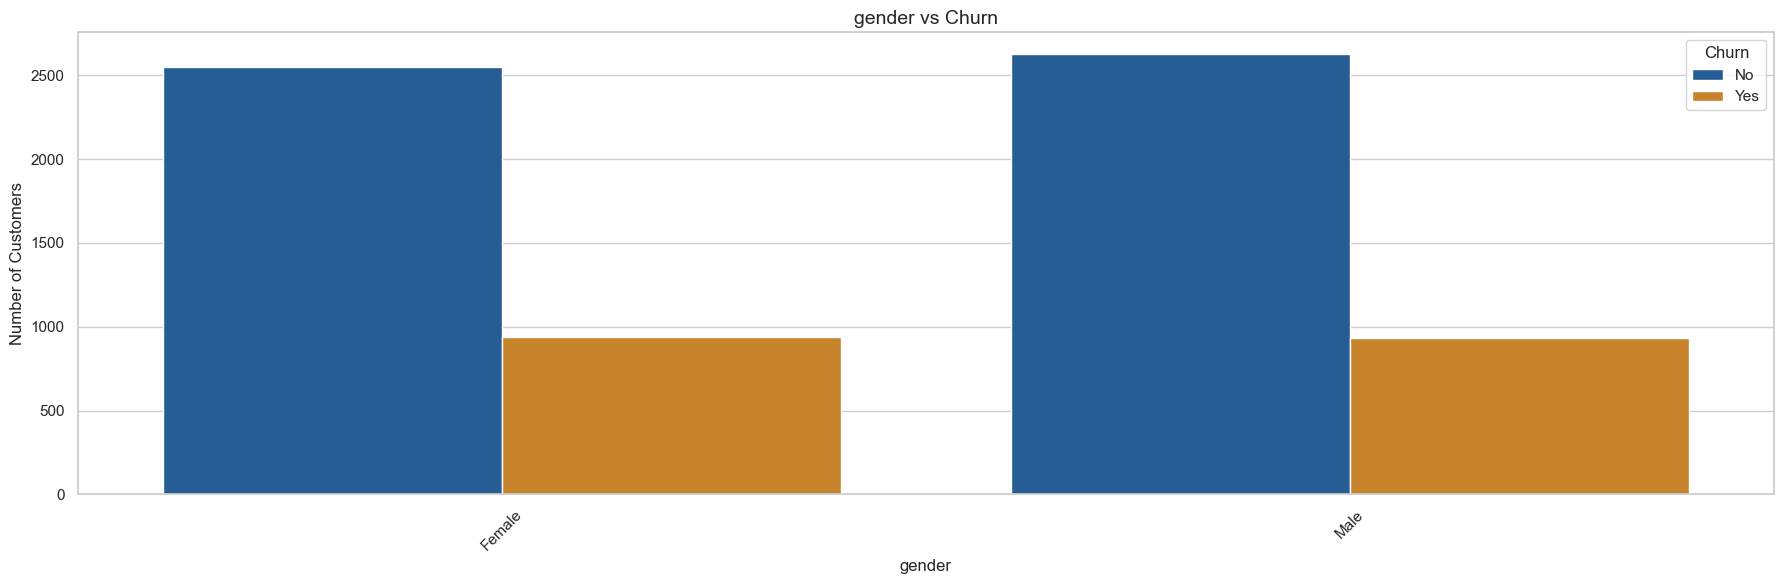

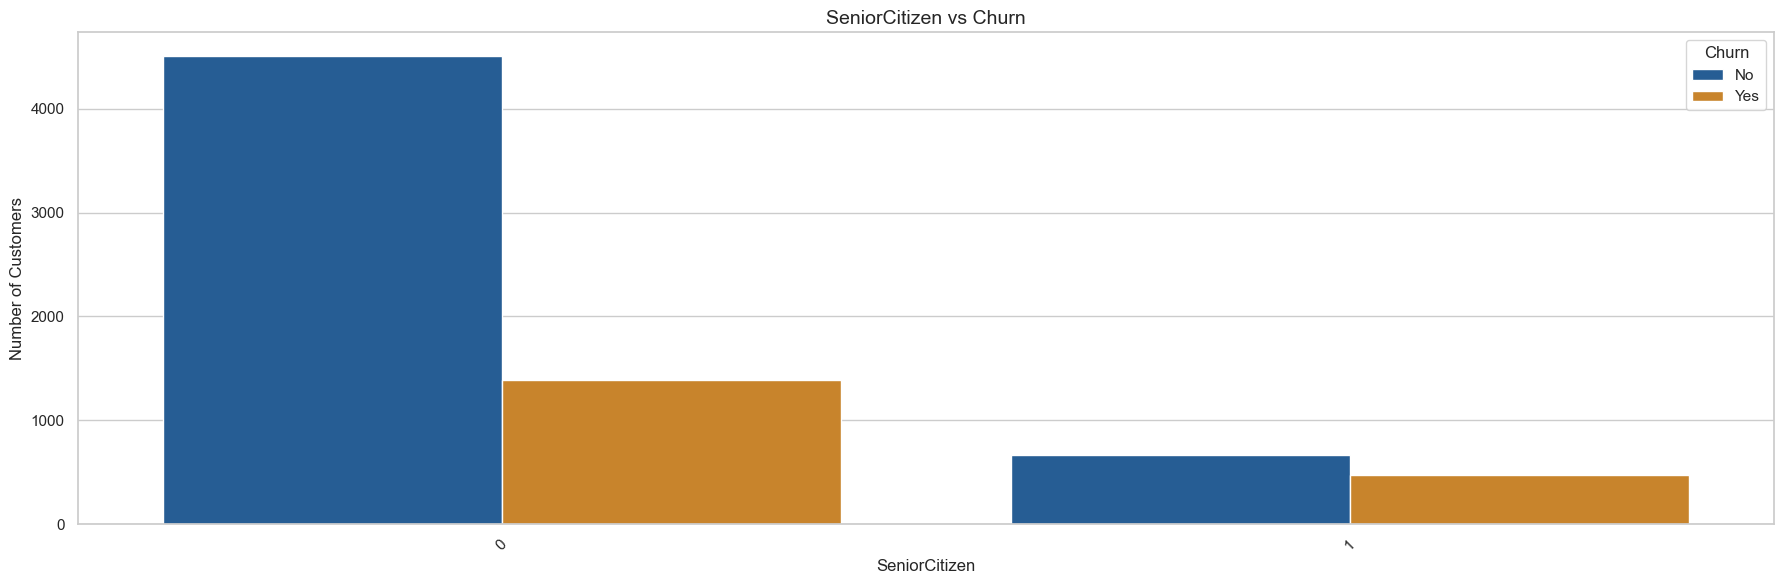

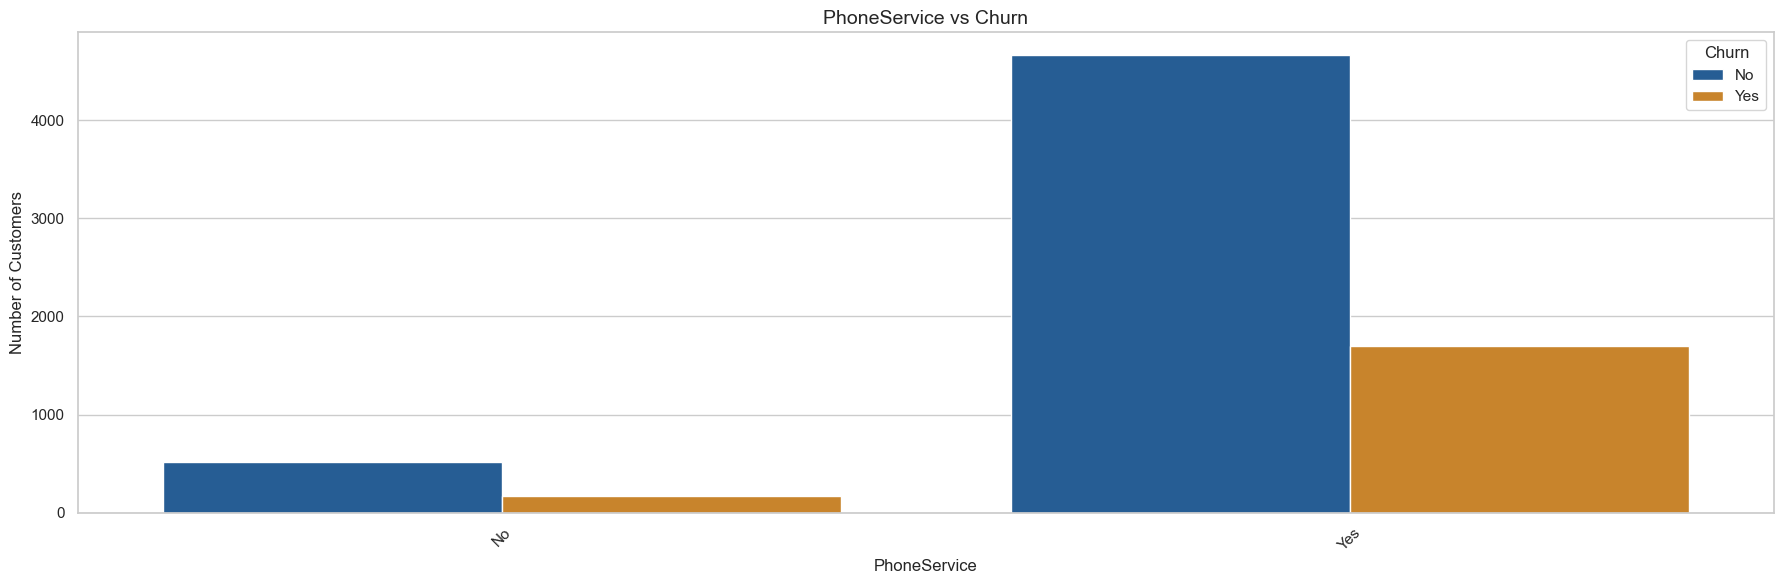

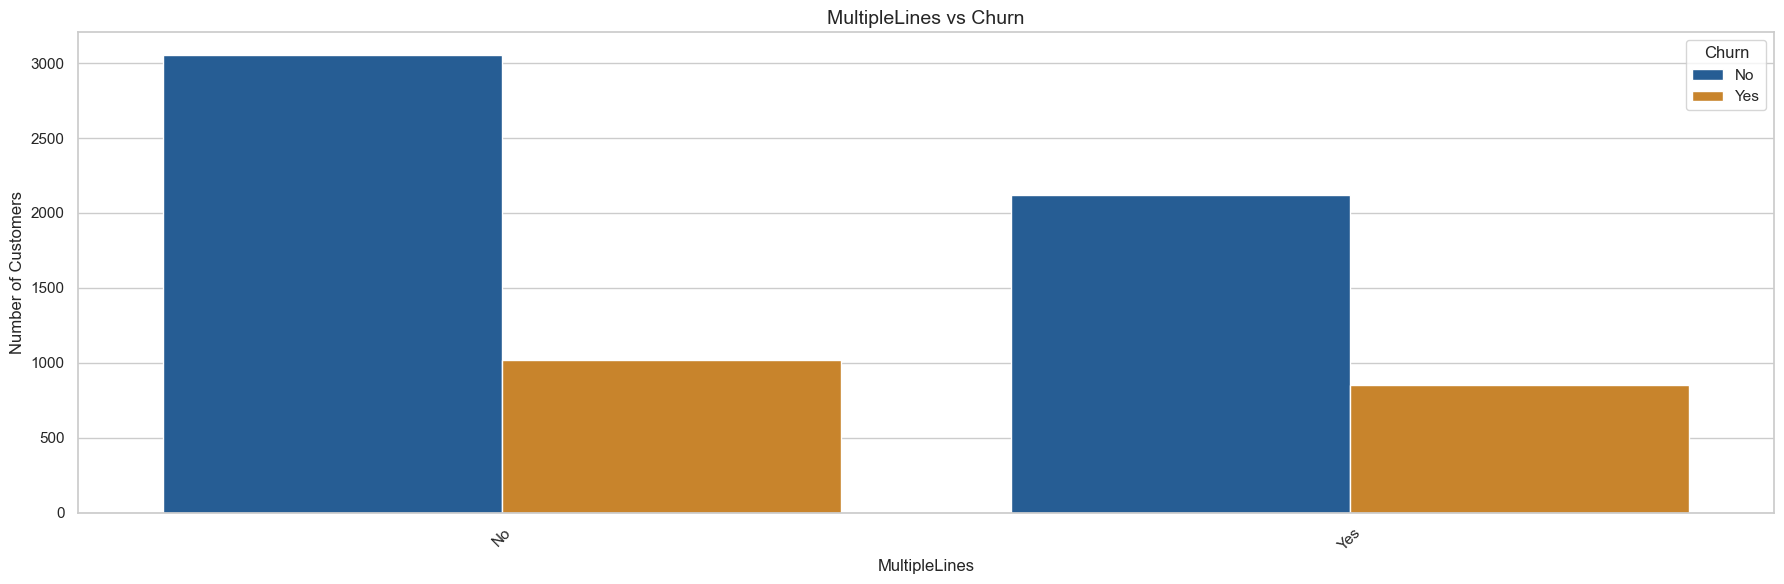

In [41]:
# List of categorical features to visulize
cat_features=['Contract','PaymentMethod','InternetService','OnlineSecurity','Partner','Dependents','PaperlessBilling','gender','SeniorCitizen','PhoneService','MultipleLines']

# Countplots with hue='Churn'
for col in cat_features:
    plt.figure(figsize=(18,6))
    sns.countplot(data=df,x=col,hue='Churn',palette=['#145da6','#e28812'])
    plt.title(f'{col} vs Churn',fontsize=14)
    plt.xlabel(col,fontsize=12)
    plt.ylabel('Number of Customers',fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

### 🔥 Categorical Features vs Churn (Percentage Heatmaps)
- Percentage-based heatmaps are used to analyze churn distribution across categorical features. This visualization highlights high-risk categories by clearly showing the proportion of churned and retained customers within each group.


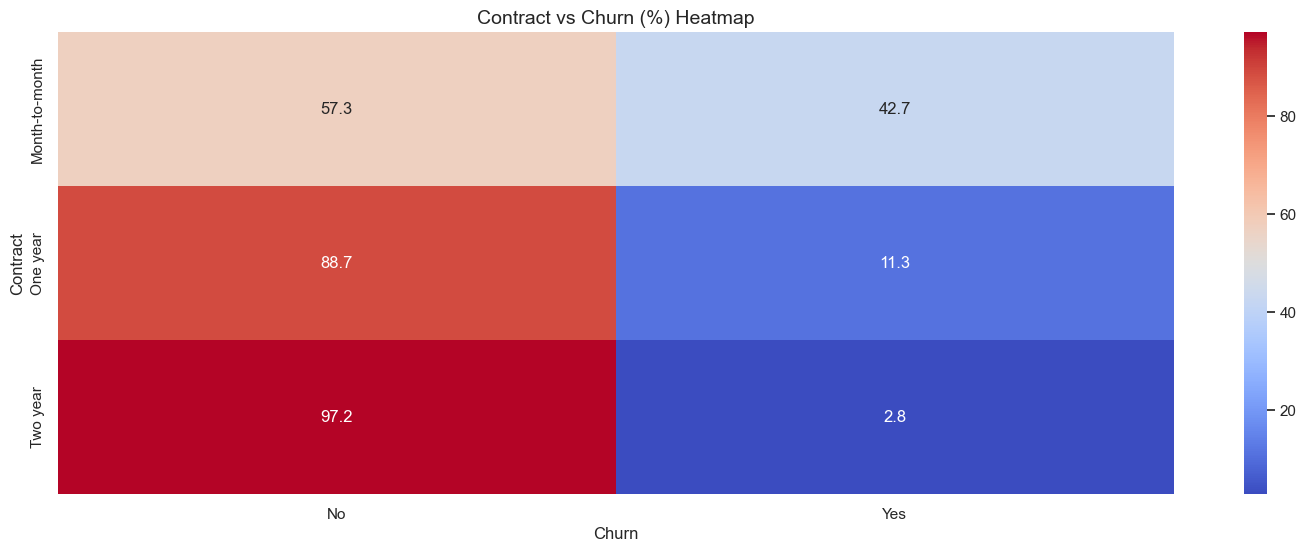

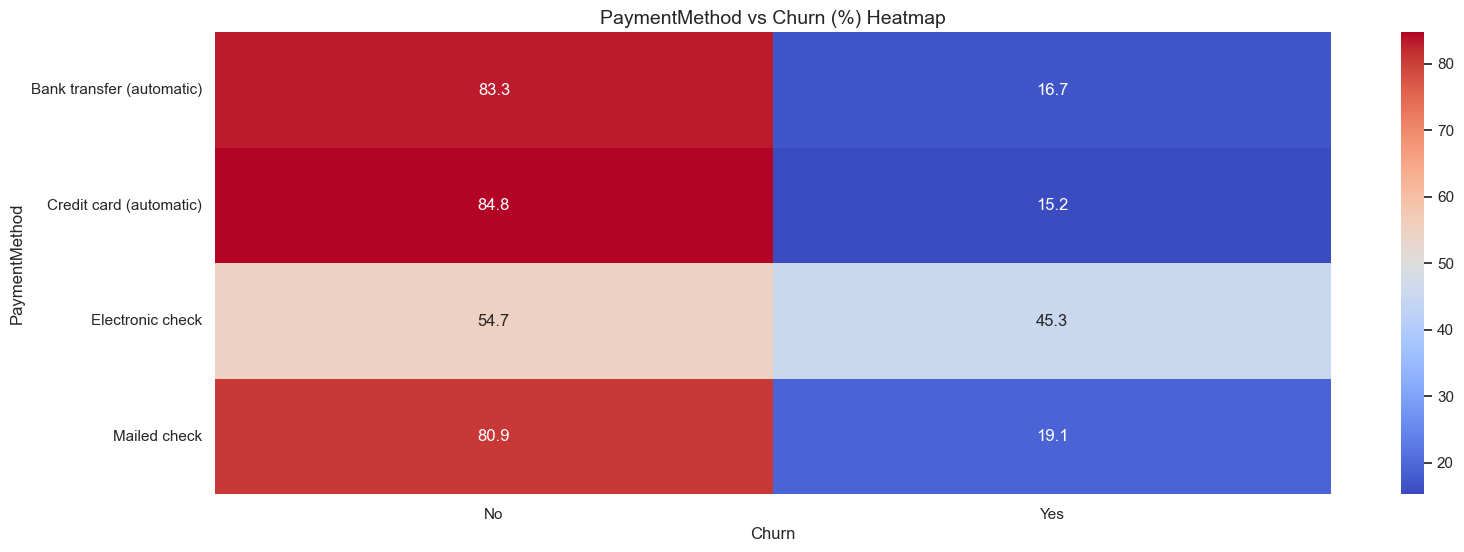

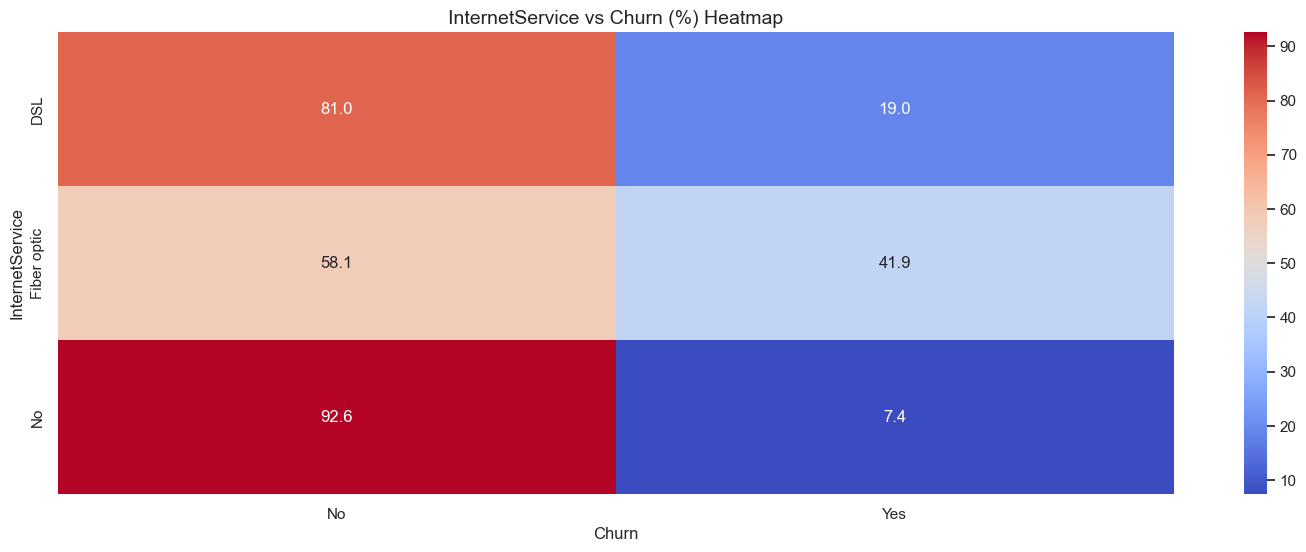

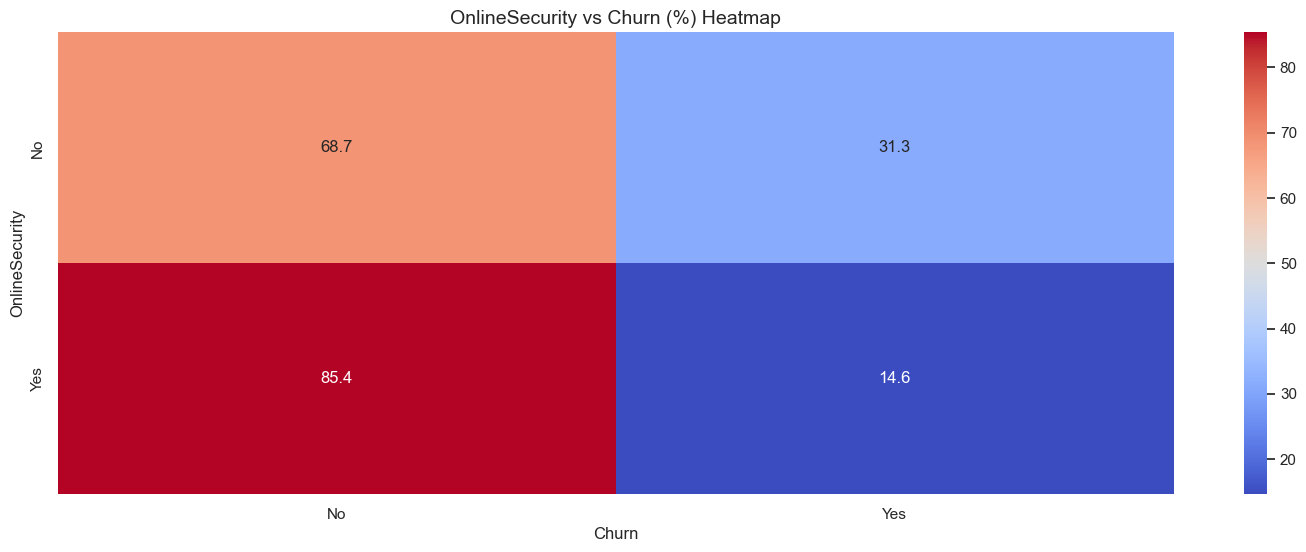

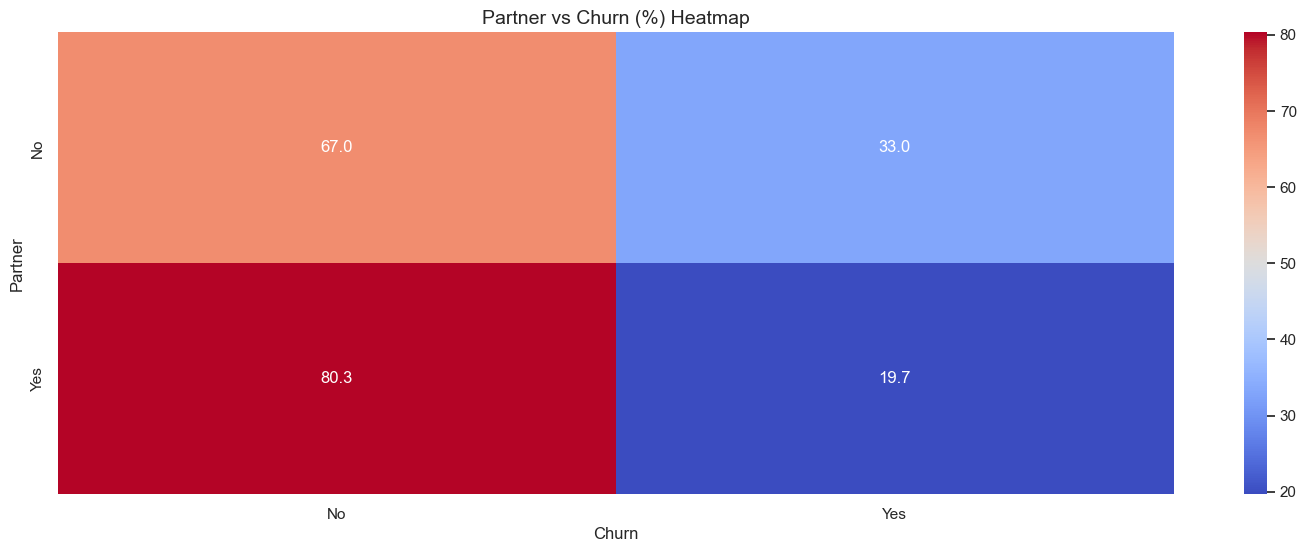

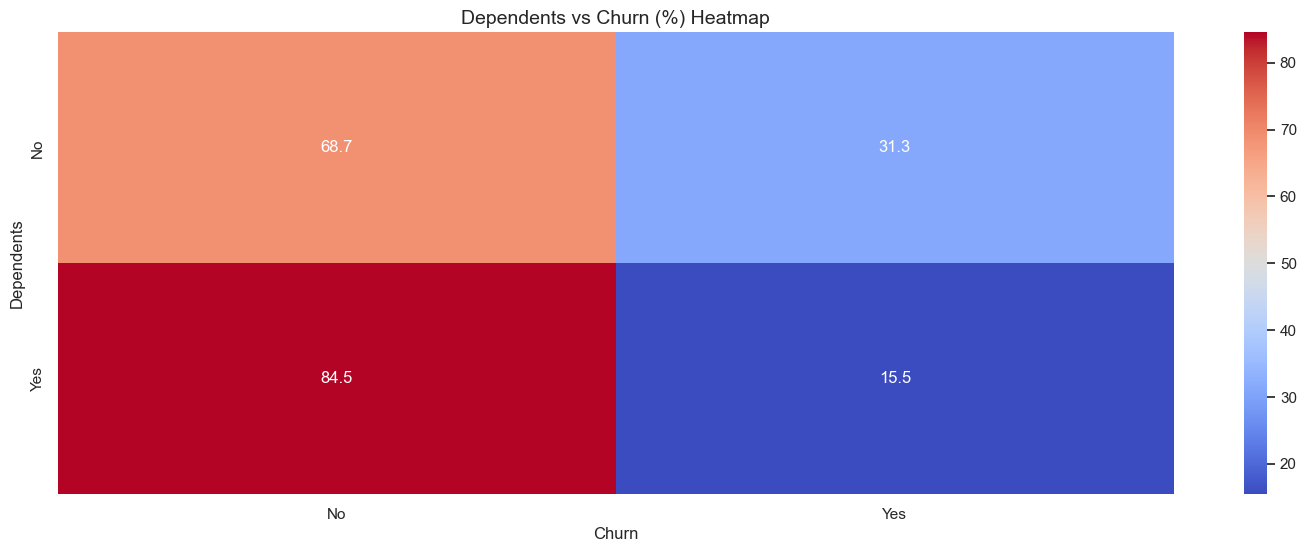

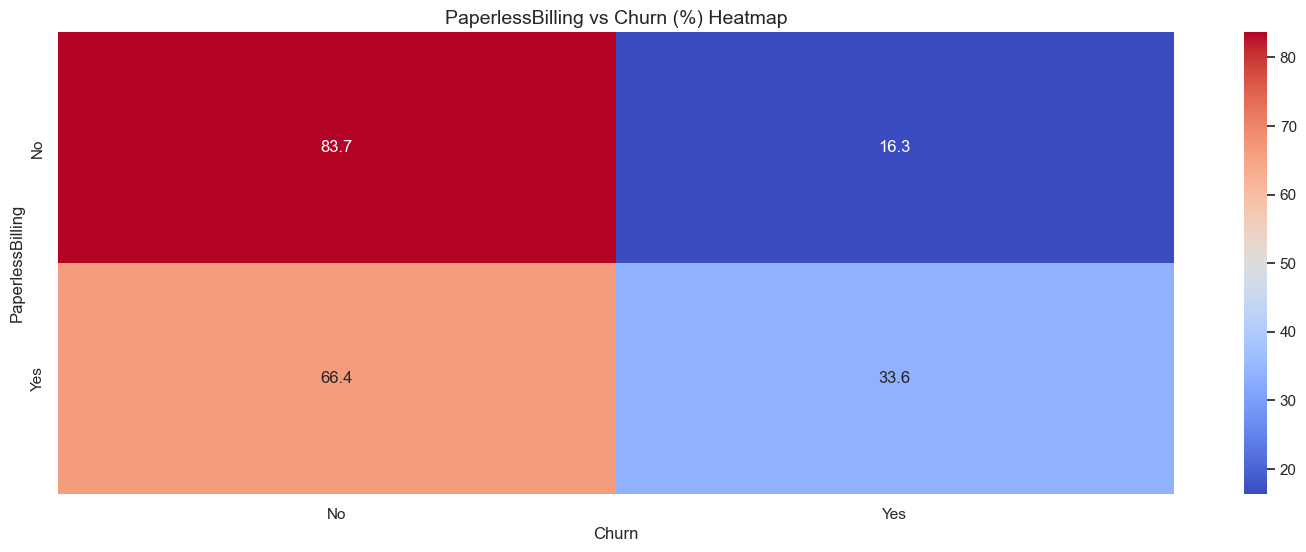

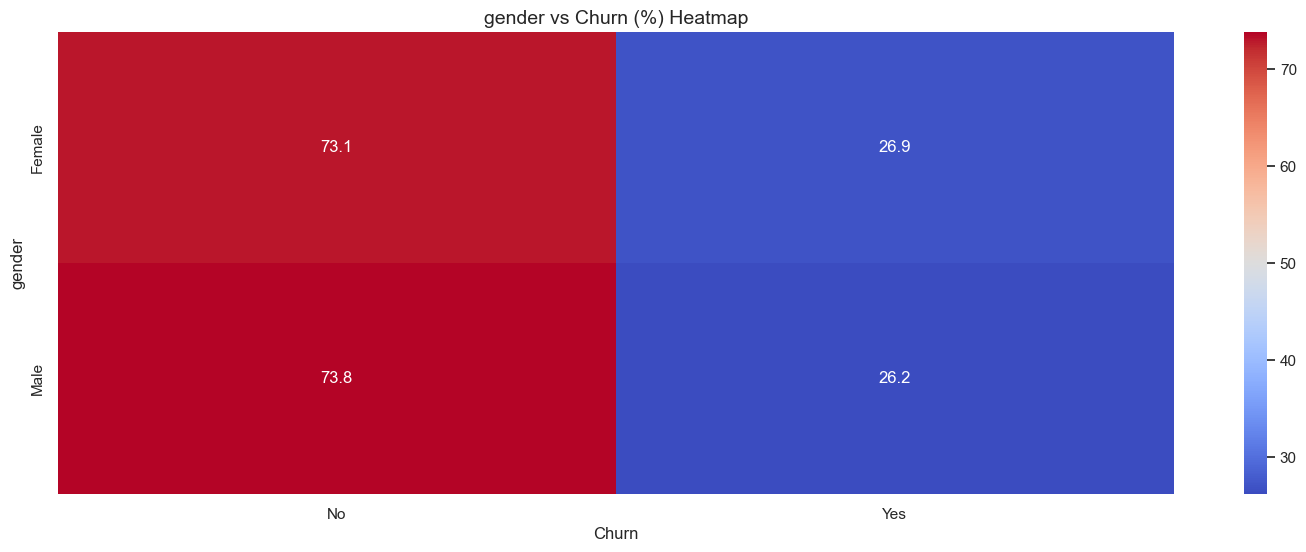

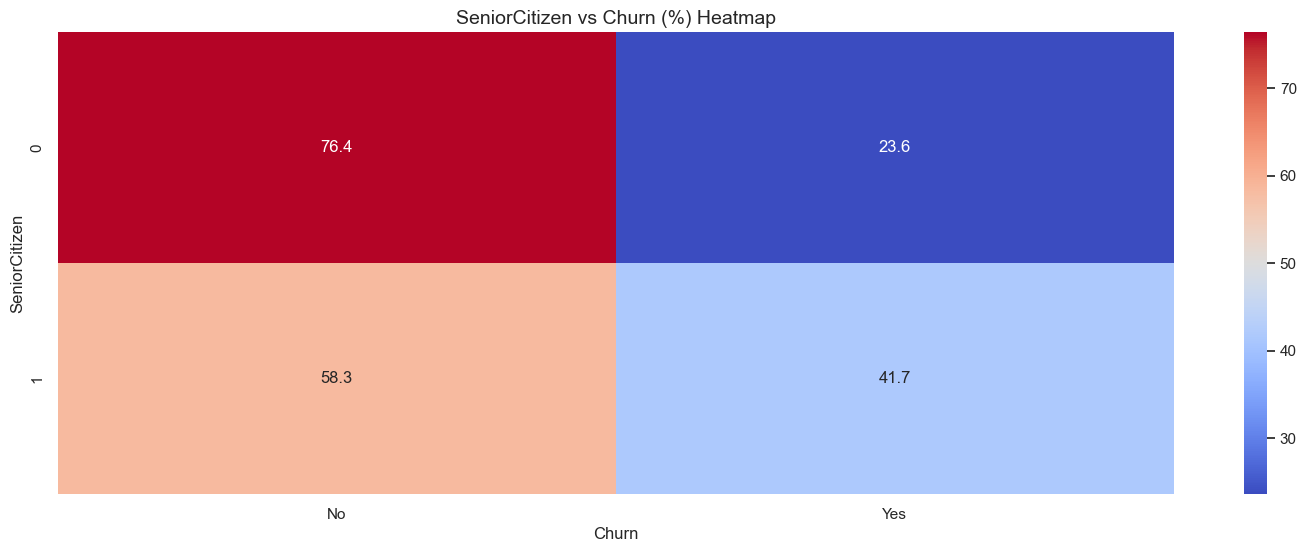

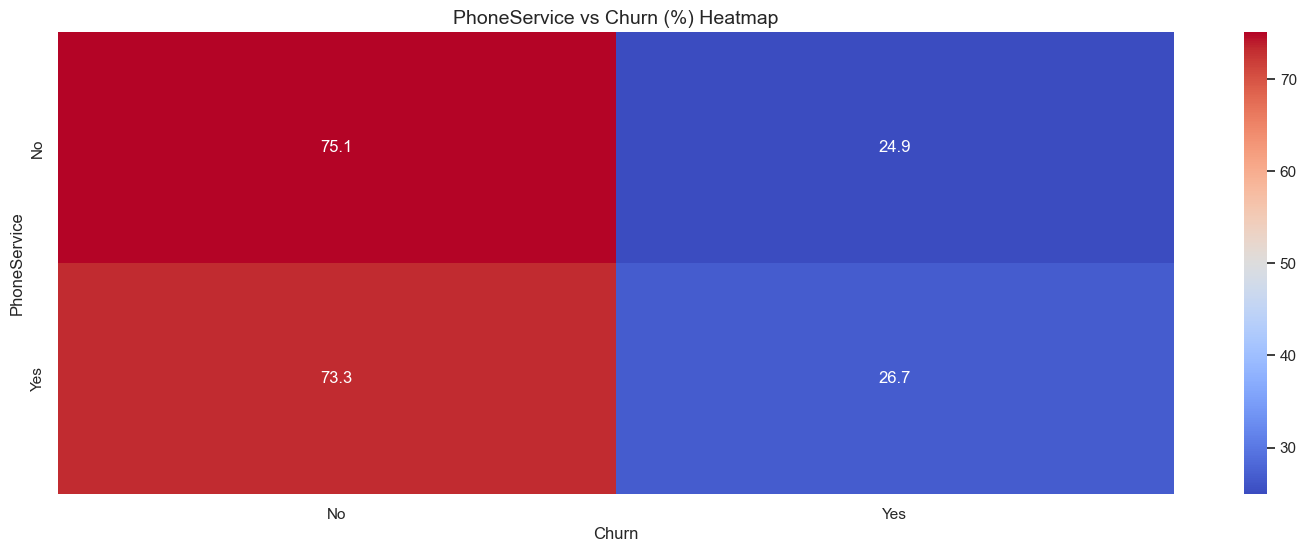

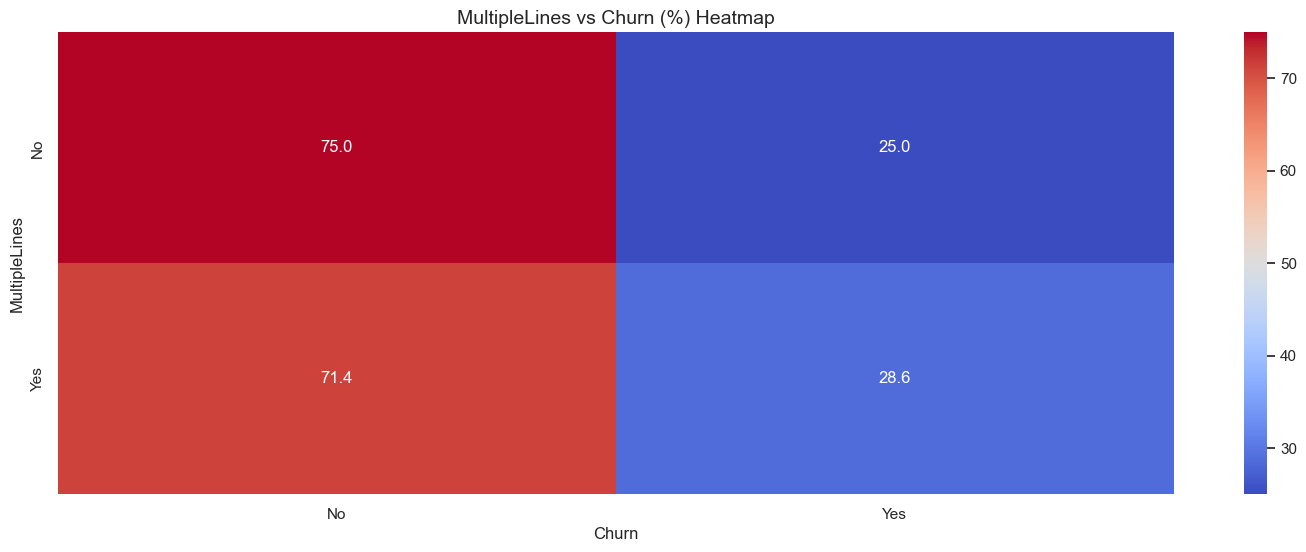

In [43]:
for col in cat_features:
    ct=pd.crosstab(df[col],df['Churn'],normalize='index')*100
    plt.figure(figsize=(18,6))
    sns.heatmap(ct,annot=True,fmt=".1f",cmap='coolwarm',cbar=True)
    plt.title(f'{col} vs Churn (%) Heatmap',fontsize=14)
    plt.ylabel(col)
    plt.xlabel('Churn')
    plt.show()

### 📈 Numerical Feature Distributions by Churn
- Histograms with KDE overlays are used to compare the distribution of numerical features between churned and retained customers. This visualization helps identify differences in spread, skewness, and overlap across churn classes.

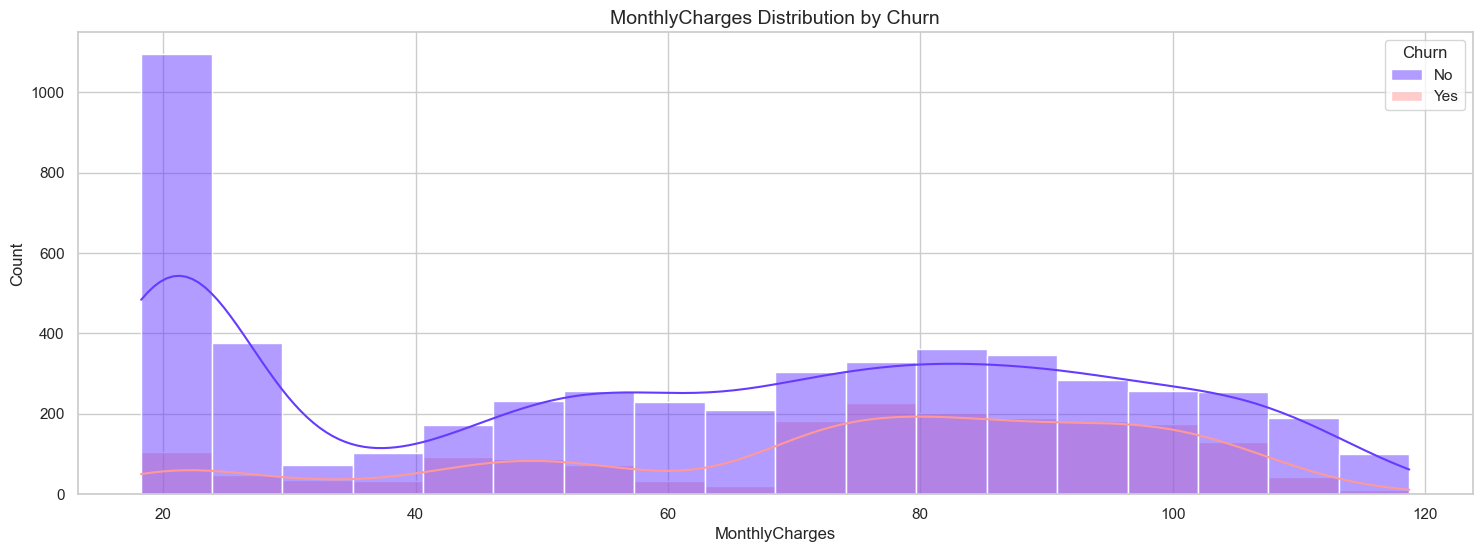

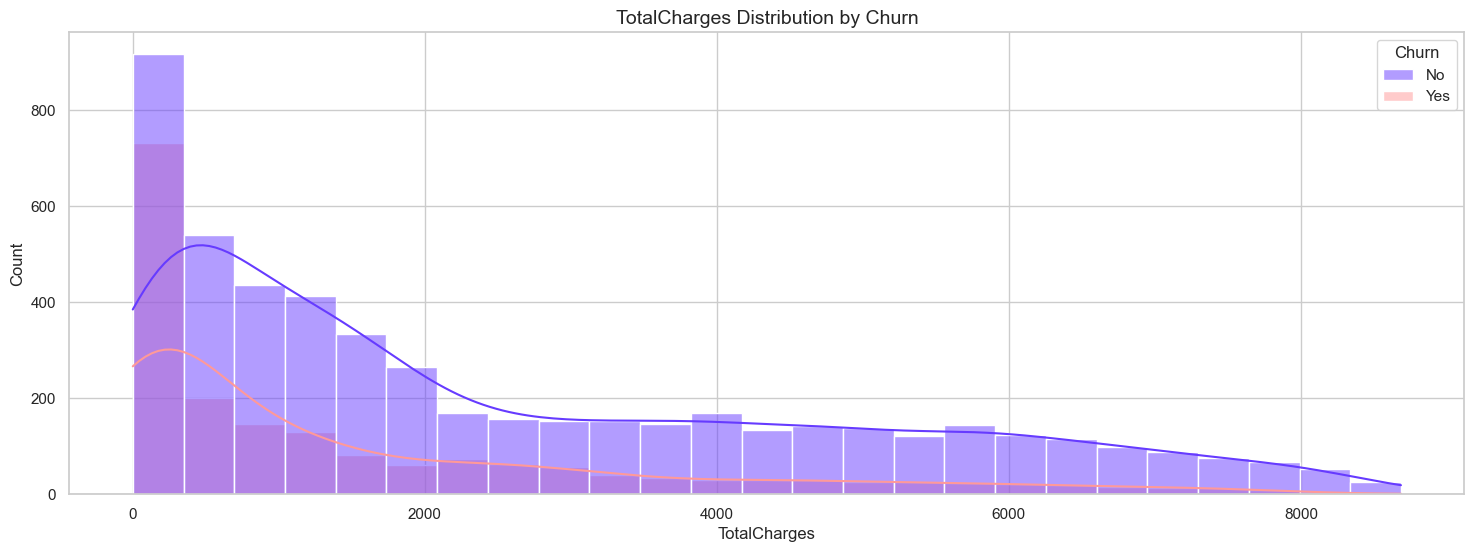

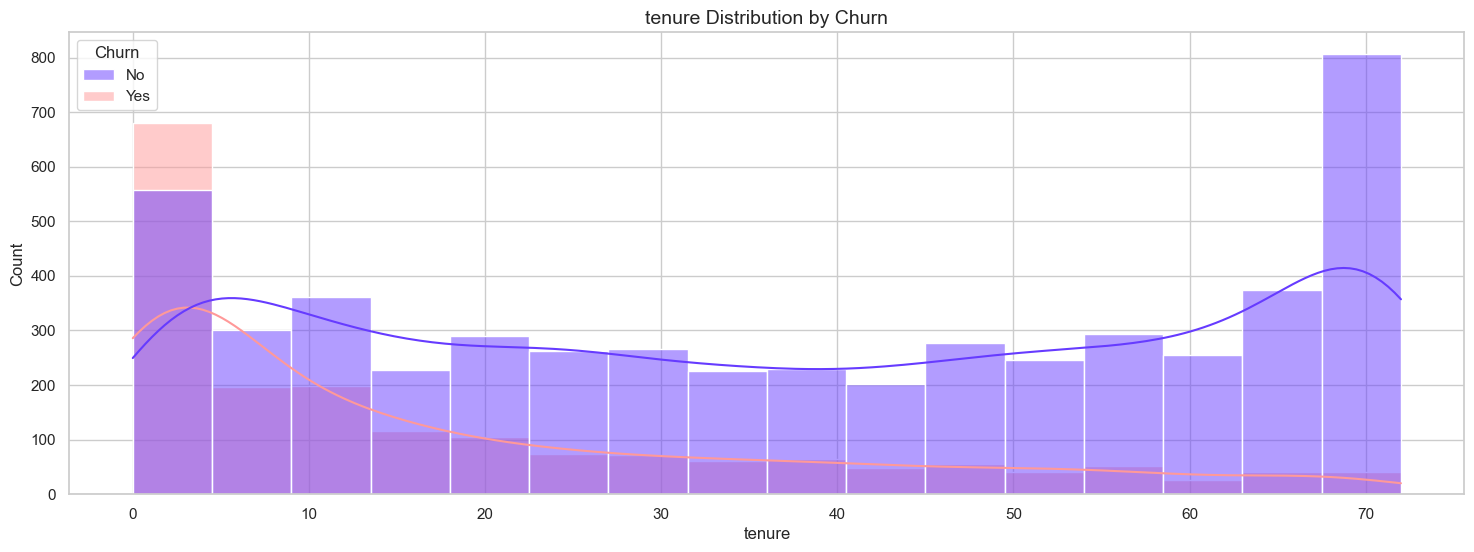

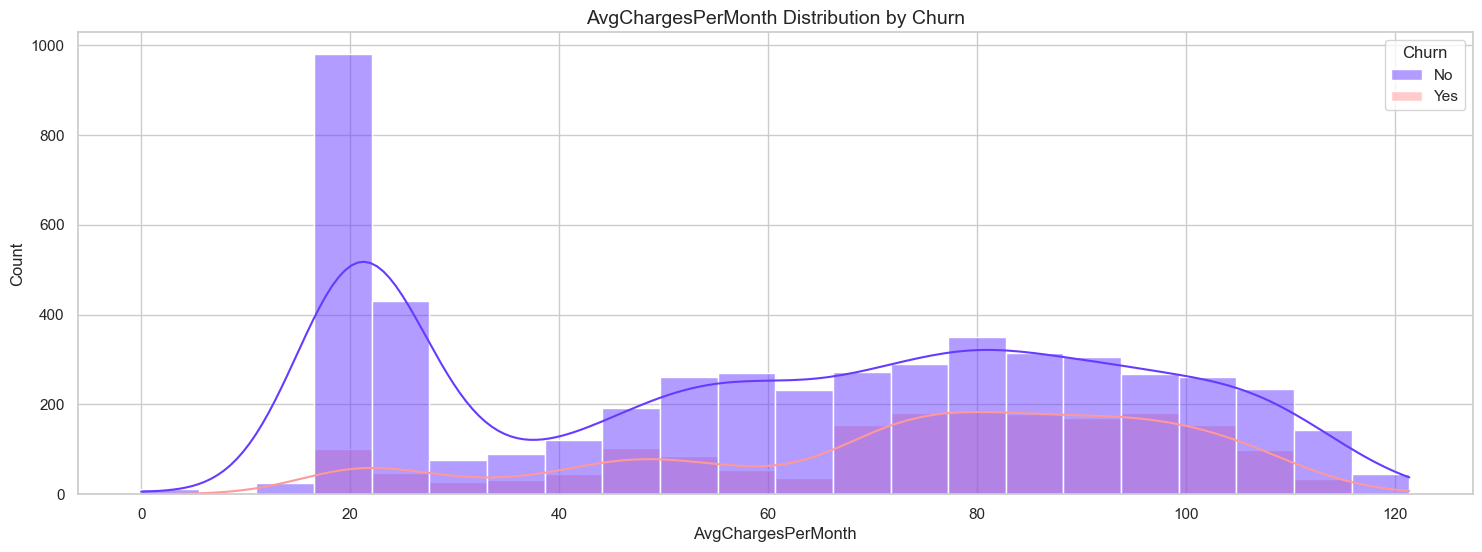

In [45]:
num_features=['MonthlyCharges','TotalCharges','tenure','AvgChargesPerMonth']

for col in num_features:
    plt.figure(figsize=(18,6))
    sns.histplot(data=df,x=col, hue='Churn',kde=True,palette=['#663bff',"#FF9999F1"], alpha=0.5)
    plt.title(f'{col} Distribution by Churn', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### 📊 Average Numerical Metrics by Category and Churn
- Grouped bar charts are used to compare the average values of numerical features across key categorical variables and churn status. This visualization helps identify how pricing and tenure-related metrics vary between churned and retained customers within different customer segments.


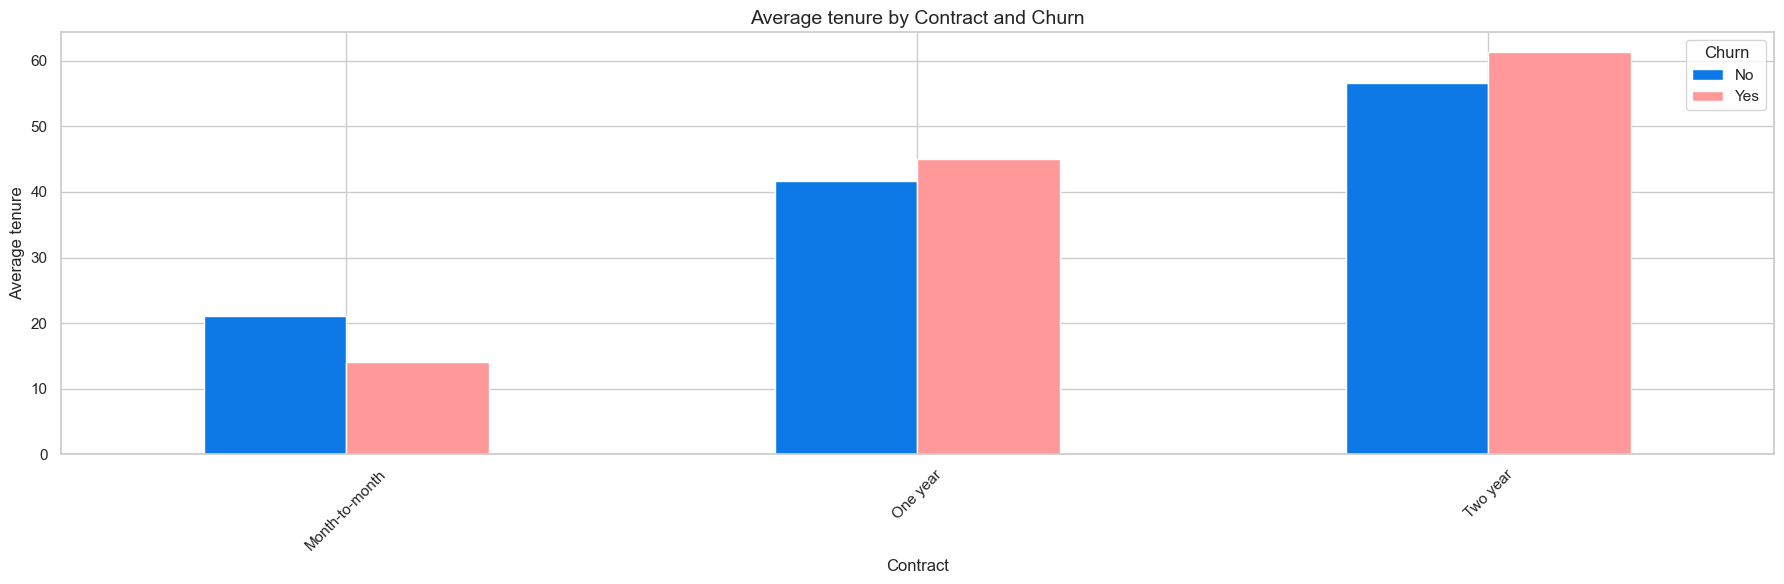

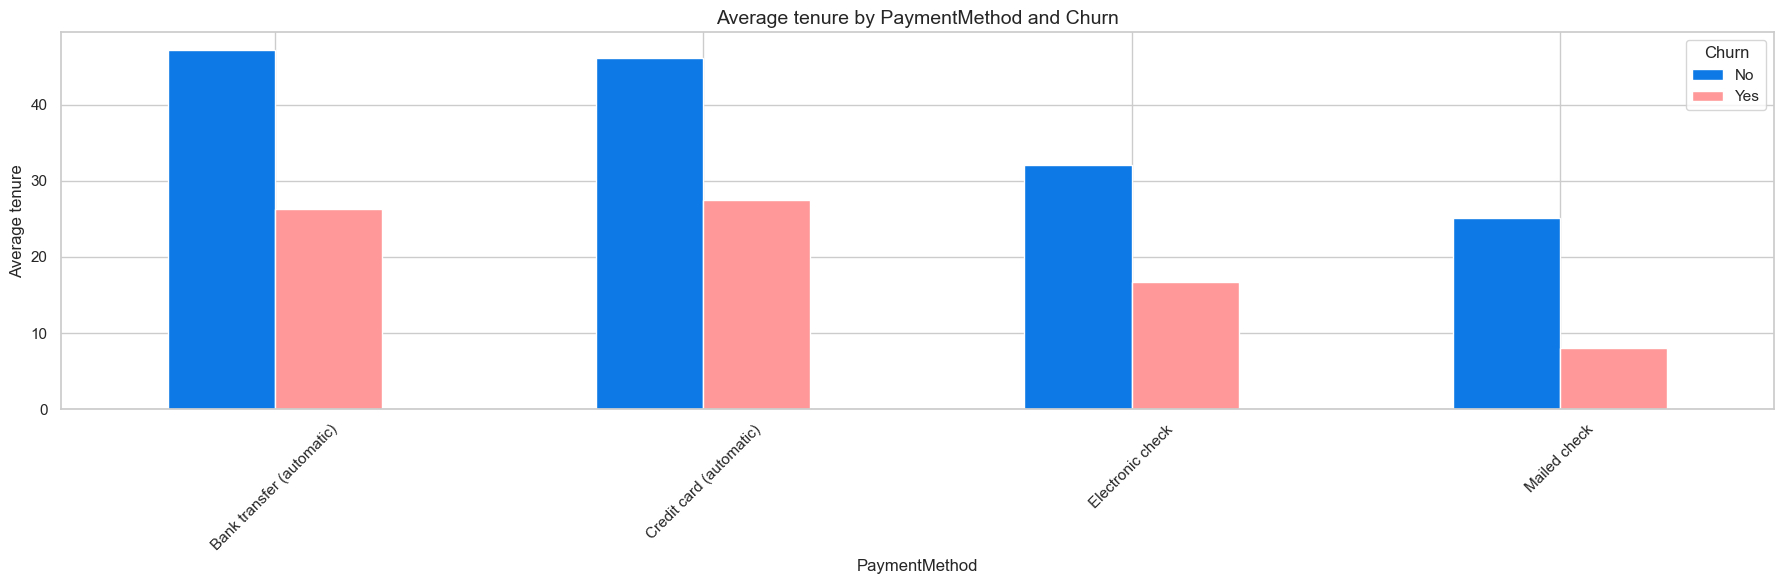

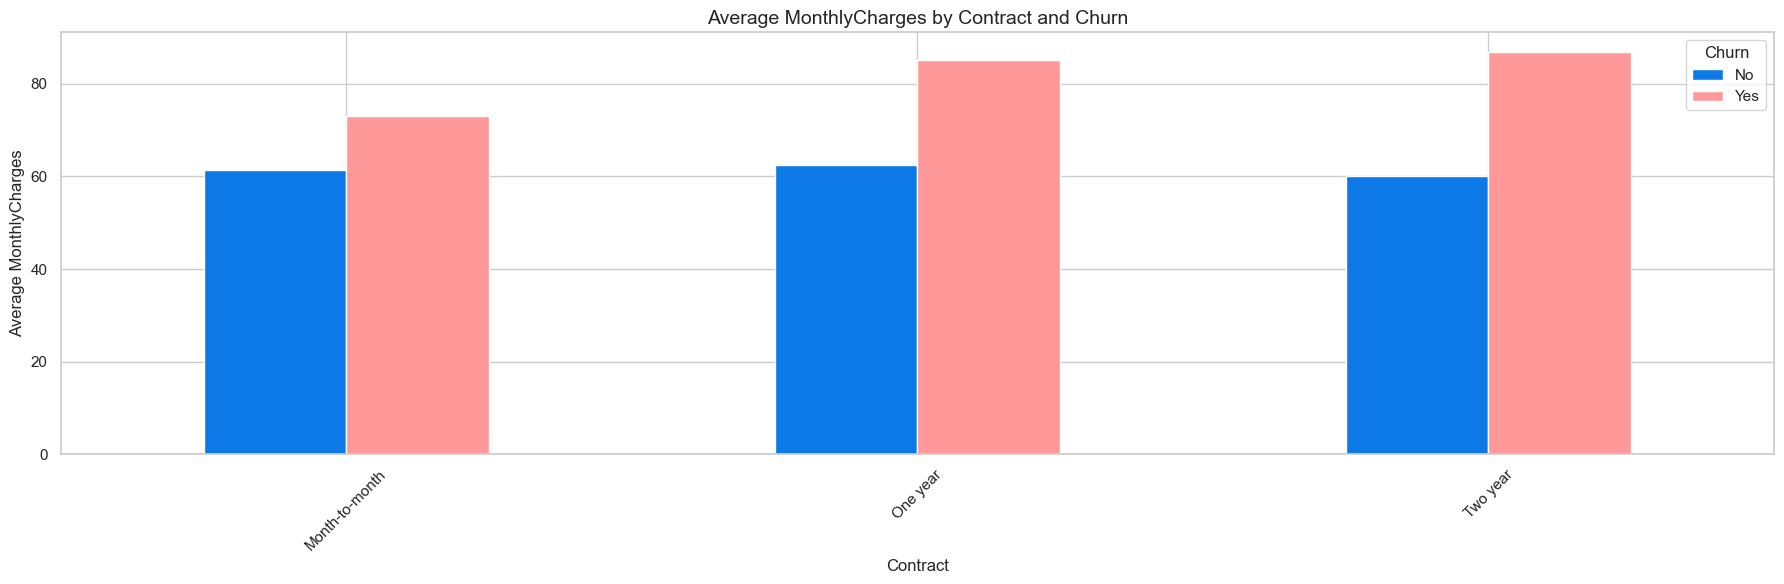

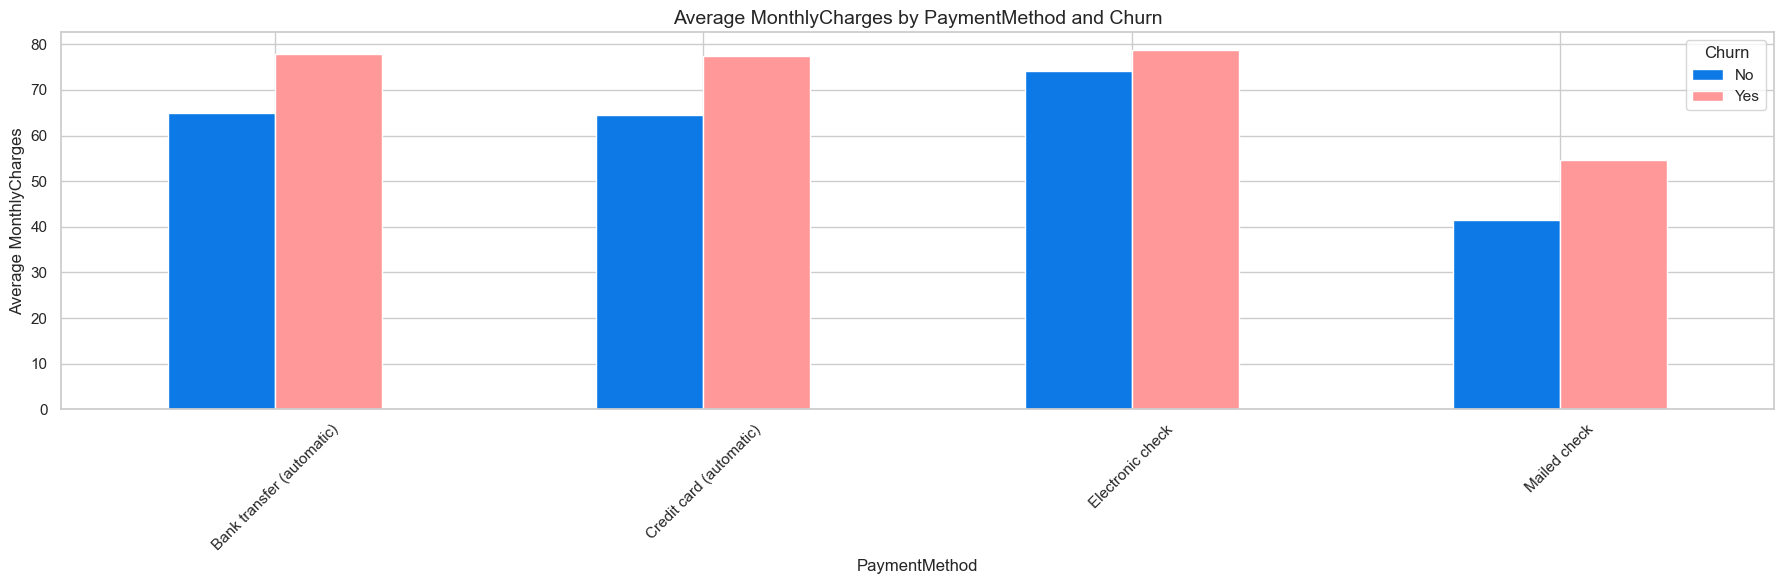

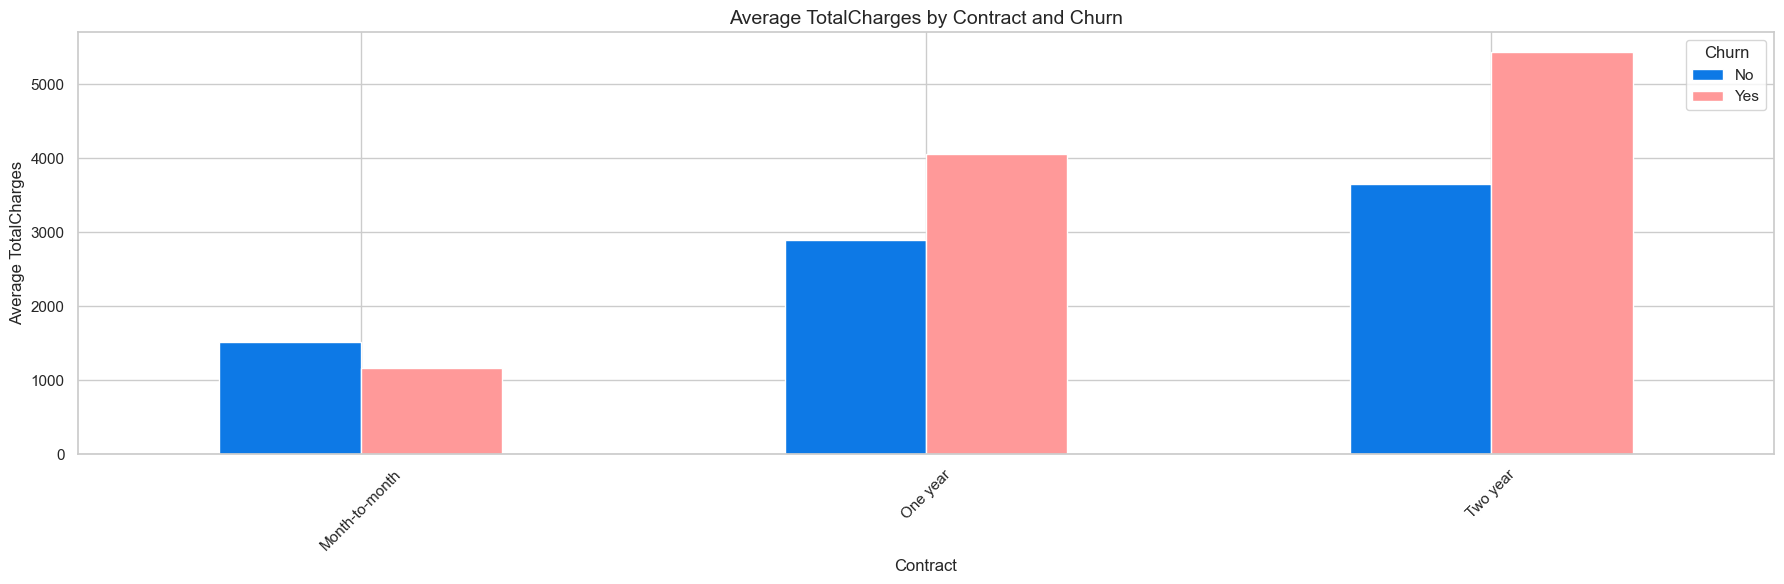

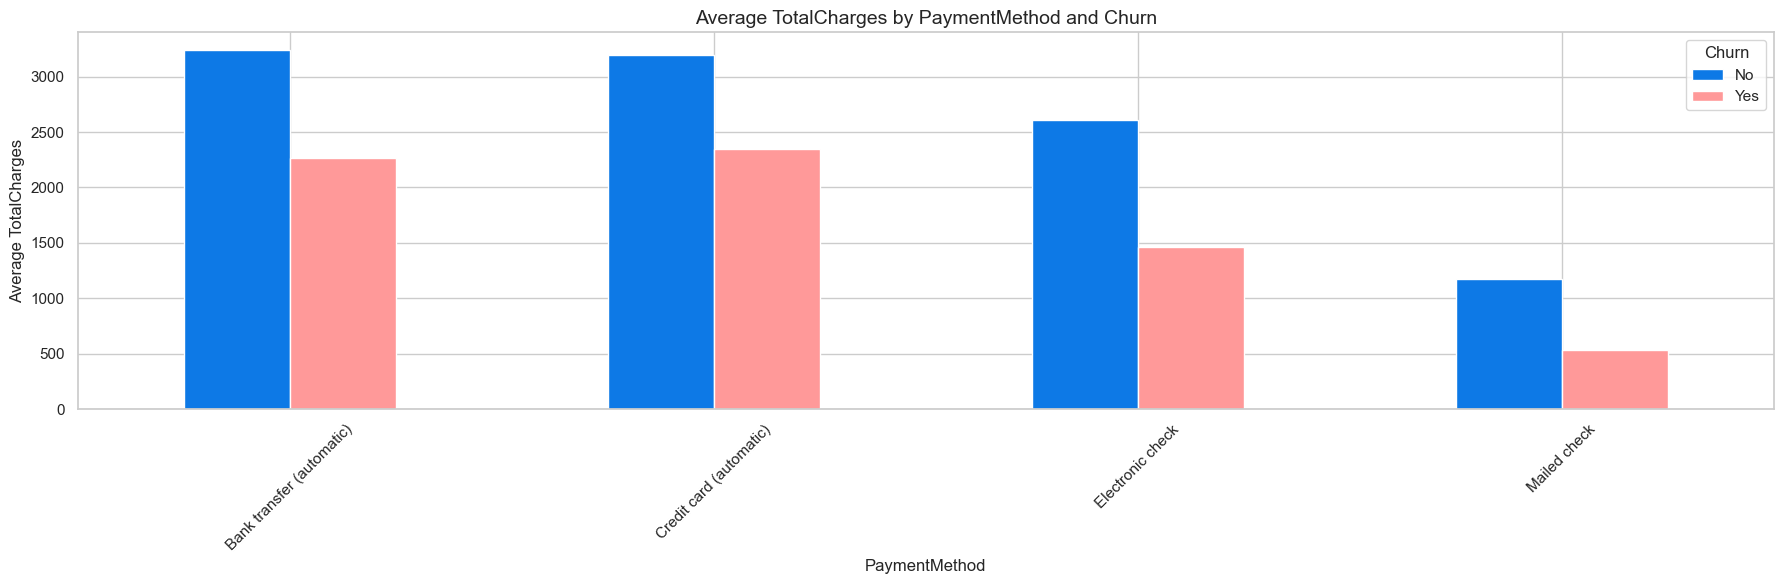

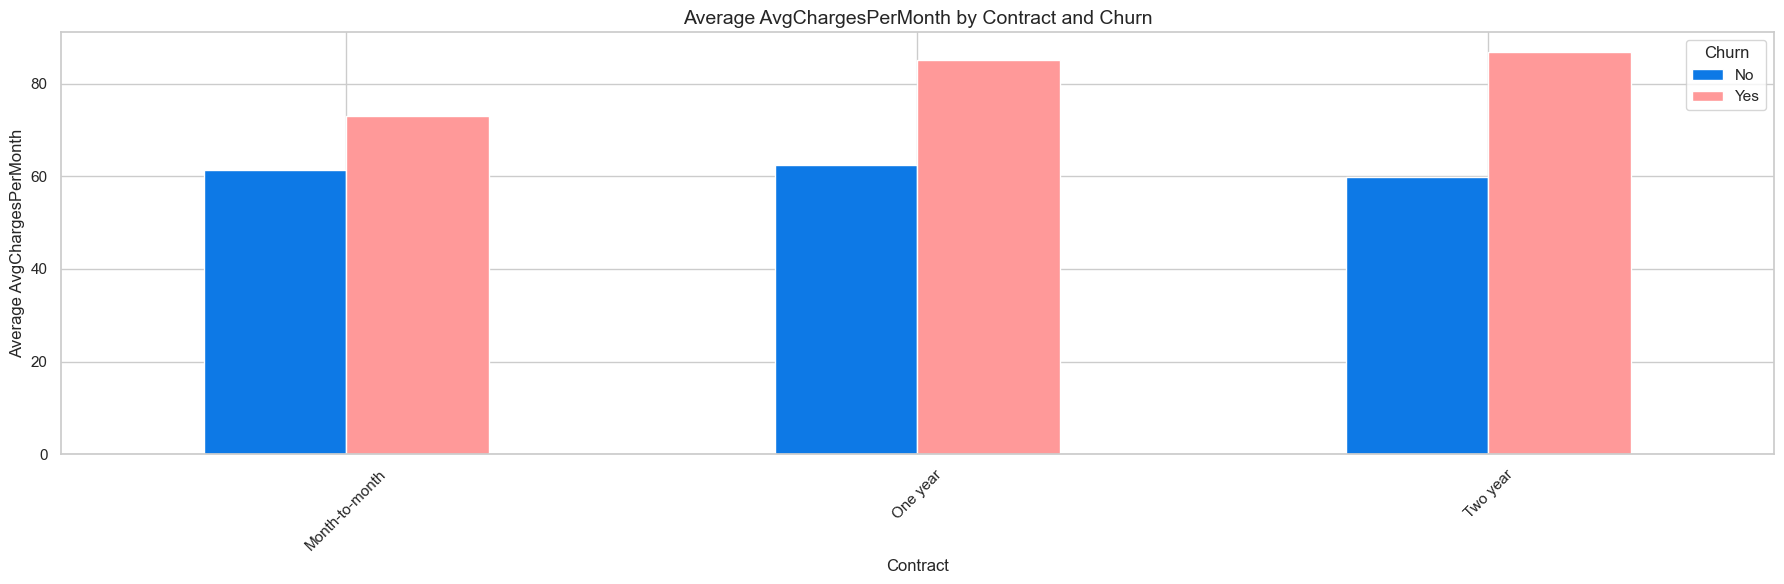

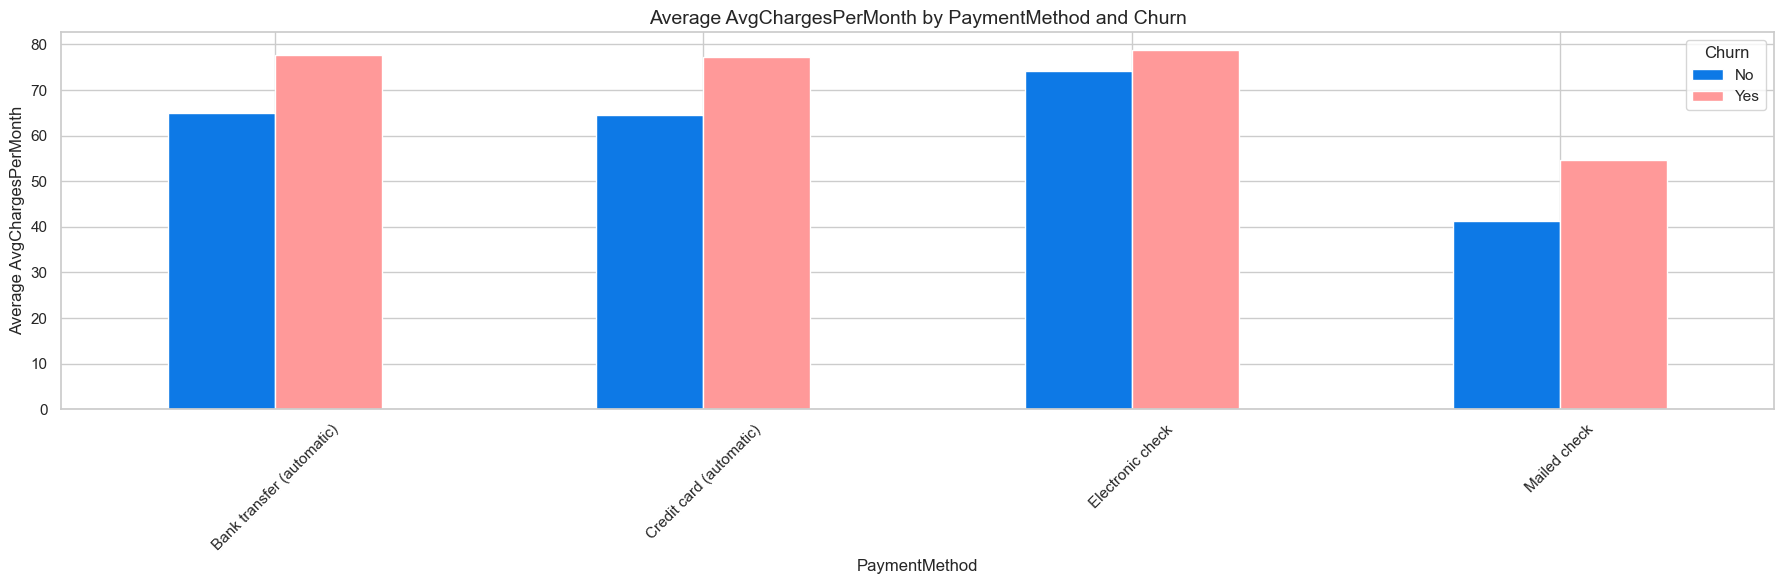

In [55]:
cat_features = ['Contract', 'PaymentMethod']

for num in num_features:
    for cat in cat_features:
        (
            df.groupby([cat, 'Churn'])[num]
            .mean()
            .unstack()
            .plot(
                kind='bar',
                figsize=(18, 6),
                color=["#0d79e6", "#ff9999"]
            )
        )

        plt.title(f'Average {num} by {cat} and Churn', fontsize=14)
        plt.ylabel(f'Average {num}')
        plt.xlabel(cat)
        plt.xticks(rotation=45)
        plt.legend(title='Churn')
        plt.tight_layout()
        plt.show()


### 📊 Feature Interaction: Contract + PaymentMethod vs Churn (%)
- A stacked bar chart is used to show the combined effect of contract type and payment method on churn percentages. This visualization highlights customer segments with higher churn risk, enabling targeted retention strategies.


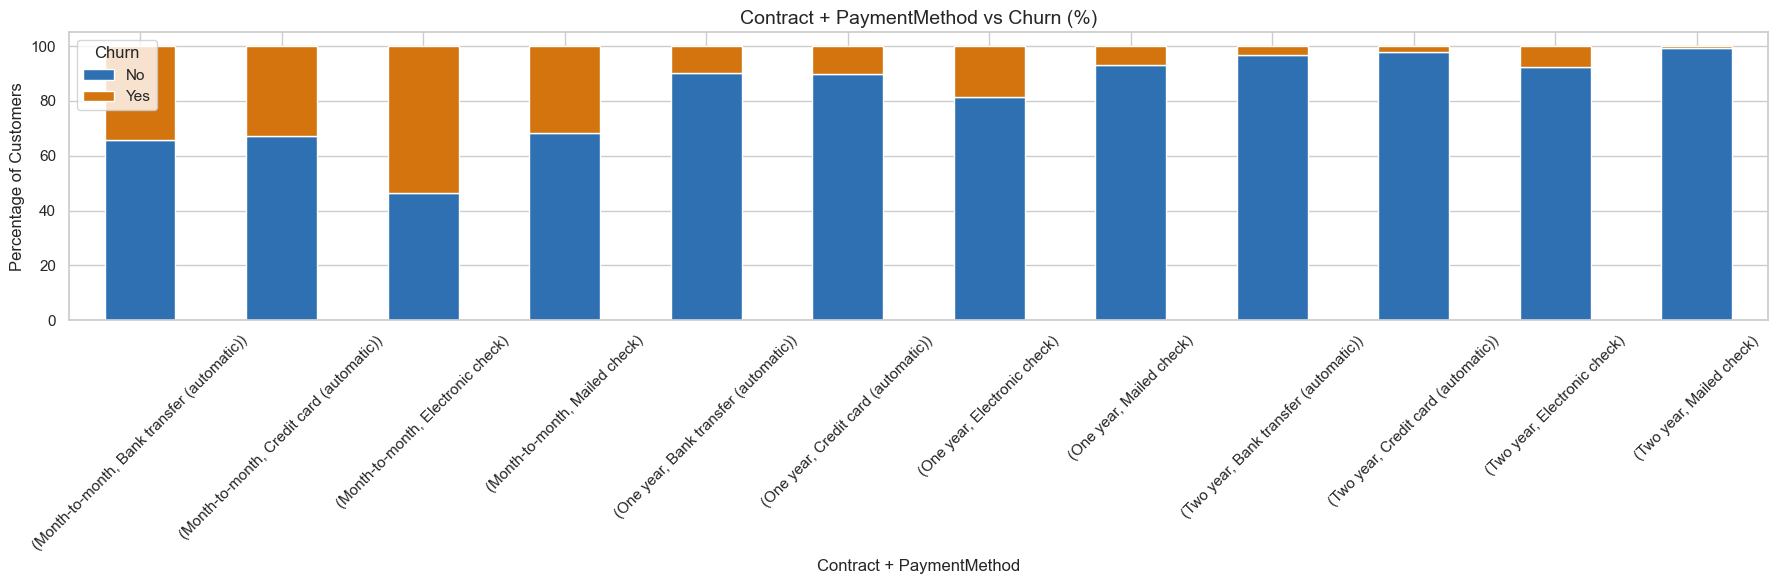

In [47]:
# Cross-tab and normalize to get percentages
ct=pd.crosstab([df['Contract'],df['PaymentMethod']],df['Churn'],normalize='index')*100

# Stacked bar chart
ct.plot(kind='bar',stacked=True,figsize=(18,6), color=["#2e70b1","#d4740e"])
plt.title('Contract + PaymentMethod vs Churn (%)', fontsize=14)
plt.ylabel('Percentage of Customers')
plt.xlabel('Contract + PaymentMethod')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### 🔥 Feature Interaction: InternetService + OnlineSecurity vs Churn (%)
- A heatmap is used to visualize churn percentages across combinations of Internet service type and online security subscription. This highlights high-risk customer segments and provides insights for targeted retention strategies.


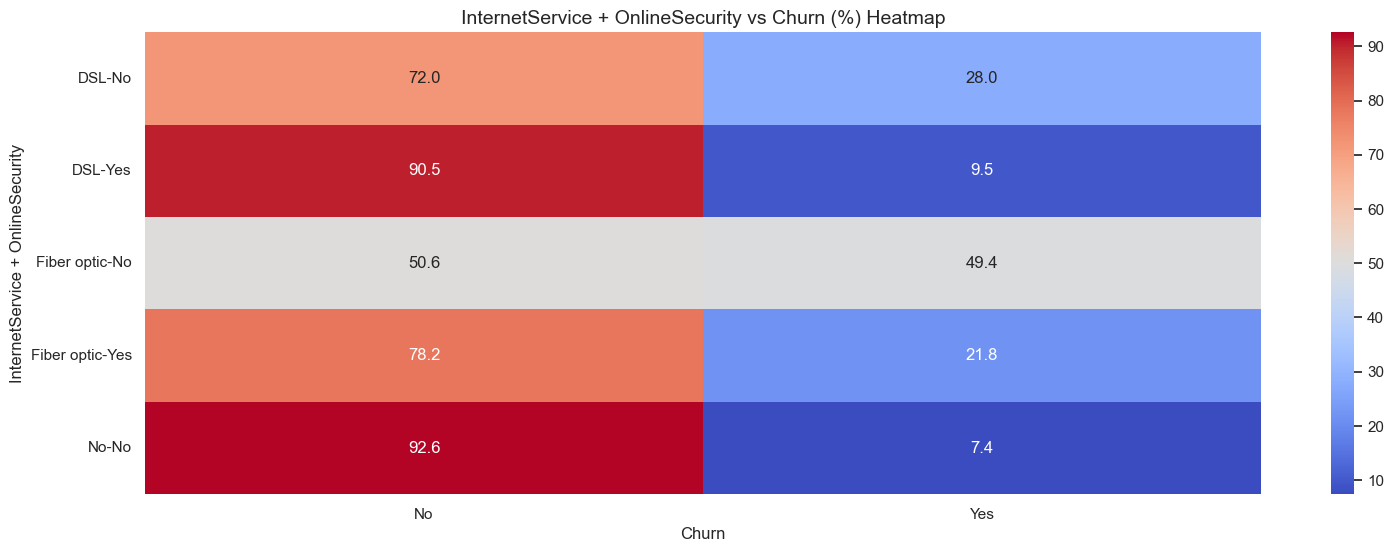

In [48]:
ct=pd.crosstab([df['InternetService'],df['OnlineSecurity']],df['Churn'],normalize='index')*100

plt.figure(figsize=(18,6))
sns.heatmap(ct, annot=True, fmt='.1f', cmap='coolwarm',cbar=True)
plt.title('InternetService + OnlineSecurity vs Churn (%) Heatmap',fontsize=14)
plt.ylabel('InternetService + OnlineSecurity')
plt.xlabel('Churn')
plt.show()

### 📊 Feature Interaction: Contract + PaperlessBilling vs Churn (%)
- A grouped bar chart is used to display churn percentages across combinations of contract type and paperless billing preference. This visualization helps identify high-risk segments and informs strategies for reducing churn.

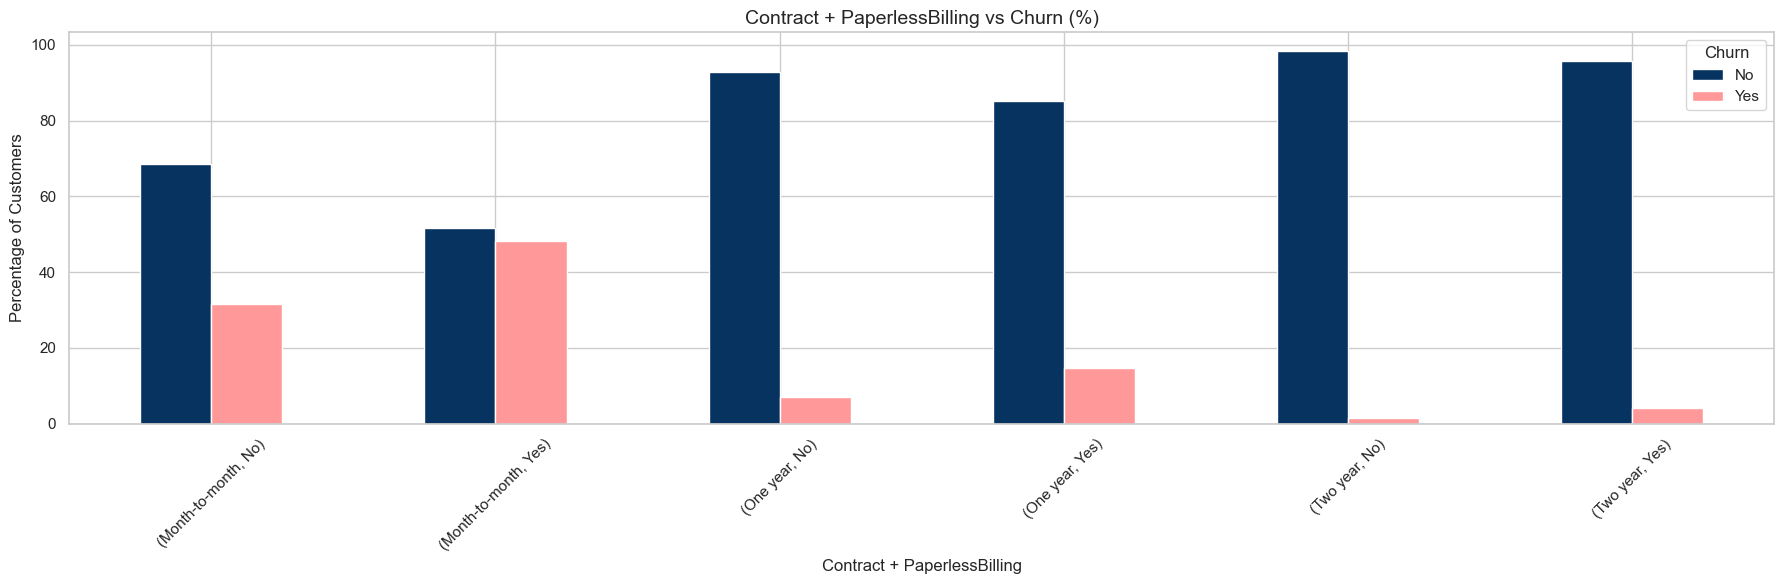

In [50]:
ct = pd.crosstab([df['Contract'], df['PaperlessBilling']], df['Churn'], normalize='index')*100

ct.plot(kind='bar', stacked=False, figsize=(18,6), color=["#063360","#ff9999ff"])
plt.title('Contract + PaperlessBilling vs Churn (%)', fontsize=14)
plt.ylabel('Percentage of Customers')
plt.xlabel('Contract + PaperlessBilling')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


### 🔗 Correlation Heatmap of Numeric Features
- A heatmap is used to visualize correlations between key numerical features. This helps identify strong relationships, multicollinearity, and potential predictors for churn modeling.


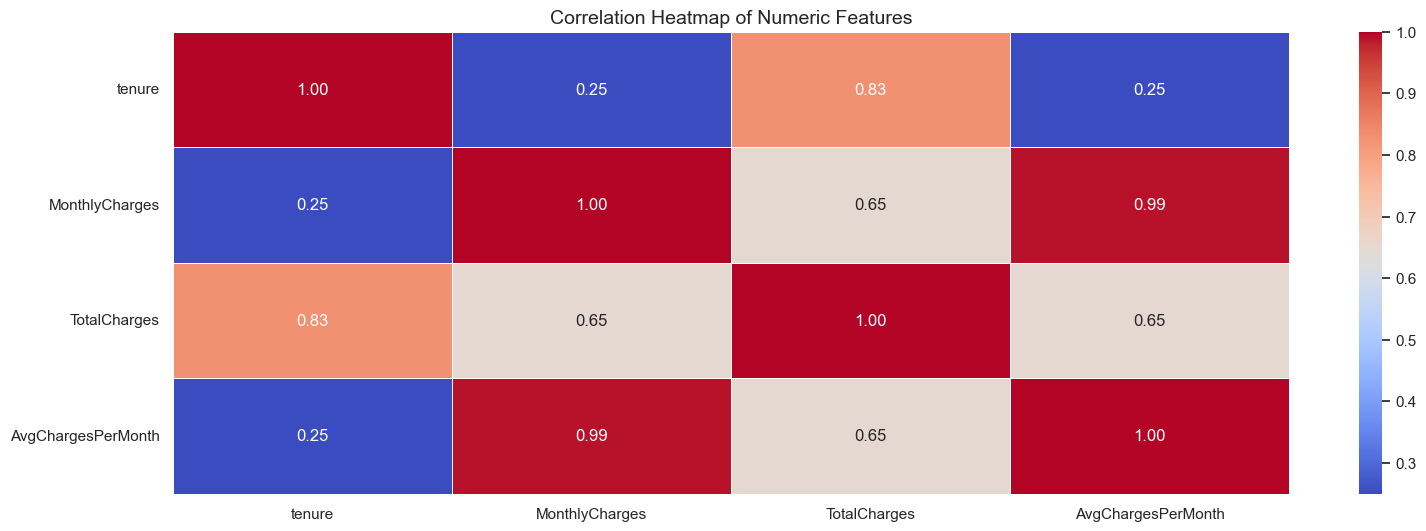

In [51]:
# Select numeric features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']

# Compute correlation matrix
corr = df[num_features].corr().round(2)

# Plot heatmap
plt.figure(figsize=(18,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.show()


### 🔗 Pairplot of Numeric Features by Churn
- A pairplot is used to visualize relationships and distributions of numerical features, colored by churn status. This aids in identifying patterns, trends, and potential interactions among features for further analysis.

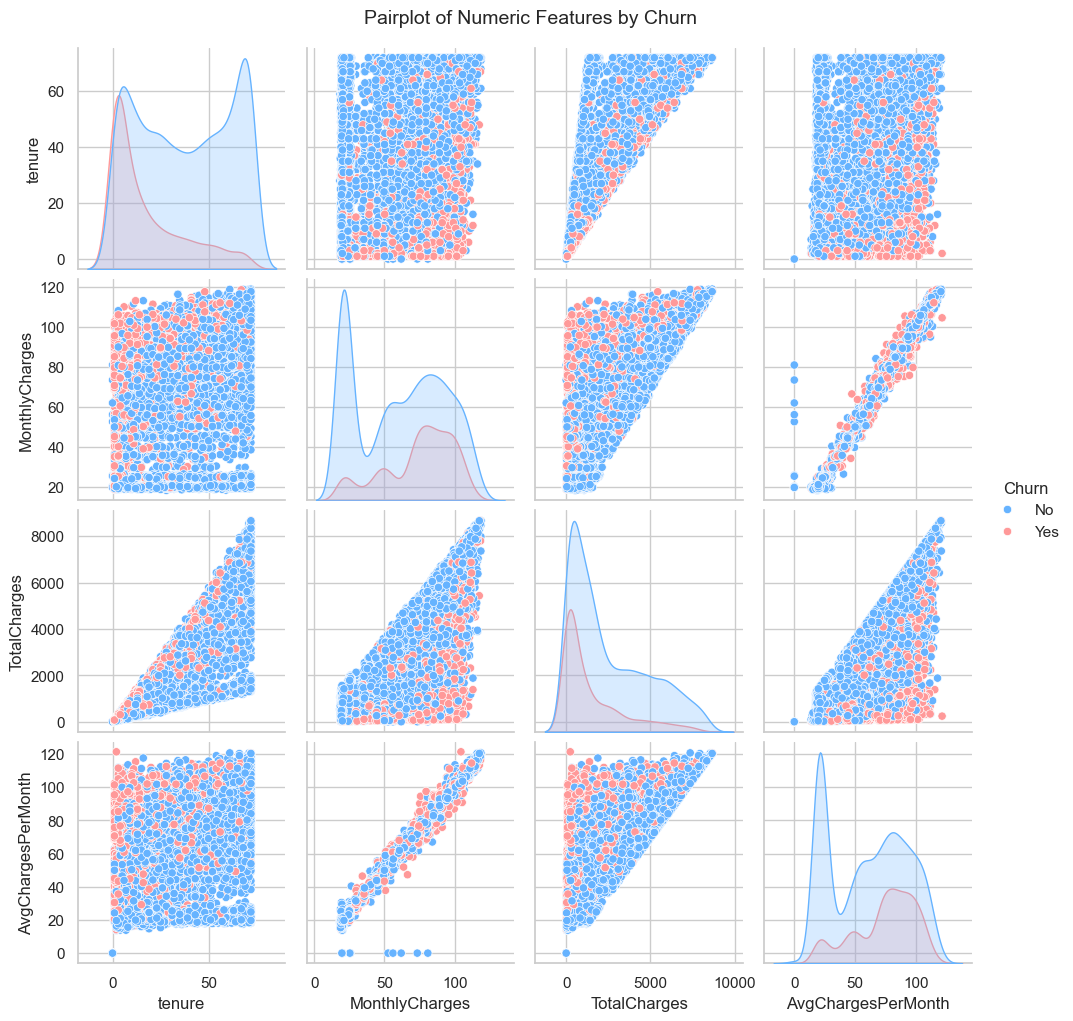

In [52]:
# Pairplot colored by Churn
sns.pairplot(df[num_features + ['Churn']], hue='Churn', 
             palette=['#66b3ff','#ff9999'], diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Numeric Features by Churn', y=1.02, fontsize=14)
plt.show()


📌 **Step 9: Advanced Interactive Visualization**

This step leverages Plotly Express for dynamic, interactive plots on the **Customer Churn dataset**, enabling zoom, hover, and rotation for deeper exploration beyond static visuals. Builds on EDA: 3D scatter reveals multi-dimensional churn clusters (e.g., low-tenure/high-charge risks); 2D bubble emphasizes size-based insights (e.g., total charges scaling). Custom colors (blues for No, reds/greens for Yes) and opacity=0.7 for clarity.

**Objectives:**
- **3D Exploration:** Tenure-Charges-Churn interplay with size (avg monthly) and hover (contract/payment).
- **2D Bubbles:** Tenure vs. MonthlyCharges by Churn, sized by TotalCharges, with extended hover.
- **Interactivity:** Hover for details; rotate/zoom to spot patterns (e.g., churn plane at ~$70 monthly).

### 9.1 3D Scatter Plot
- **Config:** x='tenure', y='MonthlyCharges', z='TotalCharges'; color='Churn'; size='AvgChargesPerMonth'; hover=['Contract', 'PaymentMethod'].
- **Layout:** Title with axis labels; legend for Churn.

**Insights:** Churn ('Yes') clusters in low-tenure (<20 mo), moderate-high monthly ($60-90), low total (<$1,500) quadrant—early dropouts. Larger bubbles (high avg charges) often No churn (loyal premium users). Hover reveals Month-to-month + Electronic check in red clusters.

### 9.2 2D Bubble Chart
- **Config:** x='tenure', y='MonthlyCharges'; size='TotalCharges'; color='Churn'; hover=['Contract','PaymentMethod','AvgChargesPerMonth'].
- **Layout:** Title with axes; legend.

**Insights:** Bubbles expand with totals—small red bubbles (low totals) at short tenure/high charges signal risks. Green large bubbles (high totals) at long tenure/low charges indicate retention. Hover shows ~$75 avg/month baseline; fiber contracts cluster in upper-left (high monthly, short tenure).


### 🌐 3D Scatter: Tenure vs MonthlyCharges vs TotalCharges by Churn
- An interactive 3D scatter plot using Plotly visualizes the relationship between tenure, monthly charges, and total charges, colored by churn status. The point size represents average charges per month, and hover data provides contract type and payment method. This multi-dimensional view highlights clusters of high-risk churn customers.


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df,x='tenure',y='MonthlyCharges',z='TotalCharges',color='Churn',opacity=0.7,size='AvgChargesPerMonth',hover_data=['Contract', 'PaymentMethod'],color_discrete_map={'No':"#184d83",'Yes':"#d61111"})

fig.update_layout(
    title='3D Scatter: Tenure vs MonthlyCharges vs TotalCharges by Churn',
    scene=dict(xaxis_title='Tenure (months)',yaxis_title='Monthly Charges ($)',zaxis_title='Total Charges ($)'),legend_title_text='Churn')

fig.show()


### 🌐 Interactive Bubble Chart: MonthlyCharges vs Tenure by Churn
- An interactive bubble chart visualizes the relationship between tenure and monthly charges, with bubble size representing total charges and color indicating churn status. Hover data includes contract type, payment method, and average charges per month, allowing detailed multi-dimensional exploration of customer segments.


In [ ]:
fig = px.scatter(df,x='tenure',y='MonthlyCharges',size='TotalCharges',color='Churn',hover_data=['Contract','PaymentMethod','AvgChargesPerMonth'],color_discrete_map={'No':"#07488a",'Yes':"#0b6612"},opacity=0.7)

fig.update_layout(
    title='Interactive Bubble Chart: MonthlyCharges vs Tenure by Churn',
    xaxis_title='Tenure (months)',
    yaxis_title='Monthly Charges ($)',
    legend_title='Churn'
)

fig.show()
